**In this project we are going to employ LSTMs, to help us understand the trend in crypto**

Ethereum is a decentralized blockchain platform that establishes a peer-to-peer network that securely executes and verifies application code, called smart contracts. Smart contracts allow participants to transact with each other without a trusted central authority.Amoung cryptocurrencies, ether is the second and only to bitcoin in market capitalization.It is open source software

**TASK IN HAND:** Predicting the Close Prices based upon previous prices

<h3>Importing the libraries and dataset</h3>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Now we will import the dataset and parse the date column. As we can see that the data has been given of every hour

In [2]:
df = pd.read_csv("D:\\My_Study\\DS_Projects\\Project 2\\Ether.csv",parse_dates=['Date'],index_col=['Date'])

In [3]:
df.head(5)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [4]:
df = df.sort_index()

In [5]:
df.shape

(34497, 7)

In [6]:
df.isna().sum()

Unix Timestamp    0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [7]:
df.duplicated().sum()

0

So there are no null values neither we have any duplicates, so let us move further where we remove two columns which will not show much effect on the analysis

In [8]:
# Both the columns won't put any affect on the analysis
df = df.drop(columns=['Unix Timestamp','Symbol'])

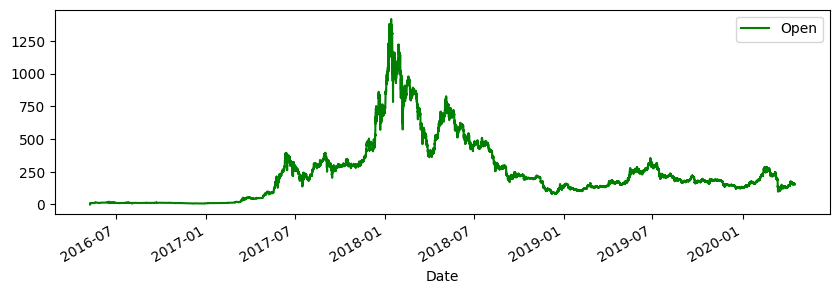

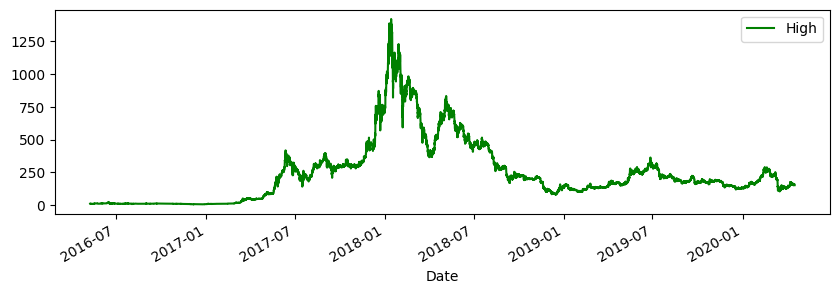

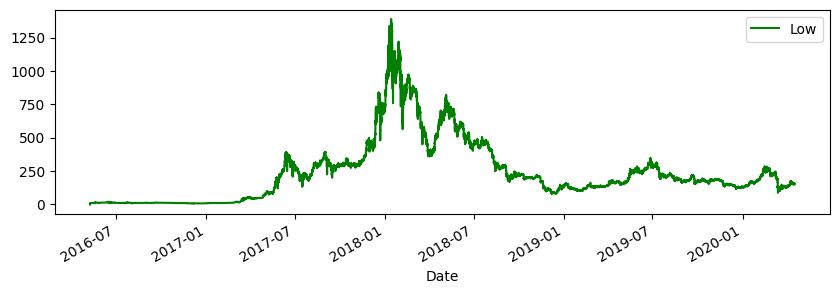

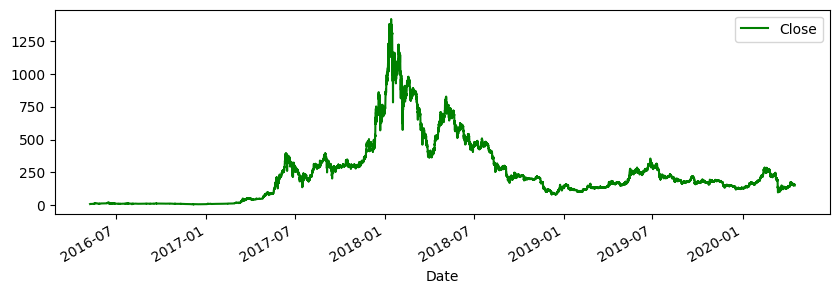

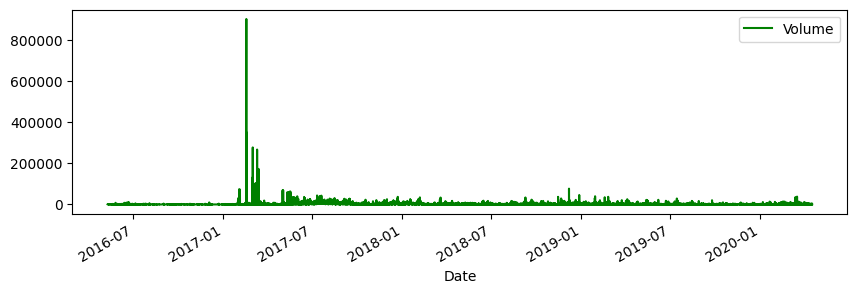

In [9]:
#Plotting each column
for i in df:
    plt.figure(figsize=(10,3))
    df[i].plot(legend=i, color = "green")
    plt.show()

Now from our Date column we will extract hours, day, month, year and other related factors

In [10]:
#creating the datatime features
def create_f(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

In [11]:
df = create_f(df)

In [12]:
df.head()

,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
Date,,,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19


<Axes: >

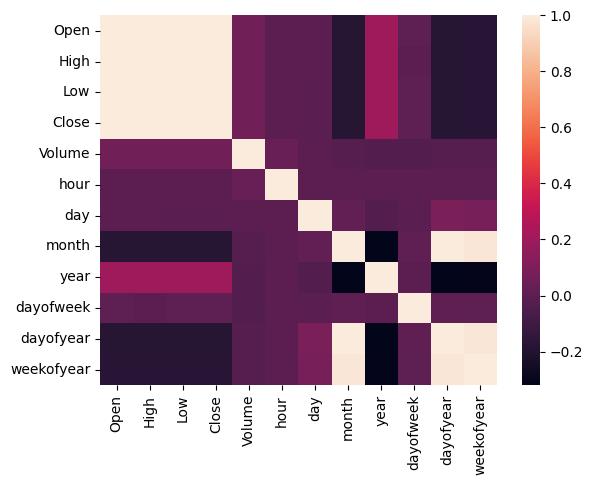

In [13]:
# Checking the Correlation between the Features
sns.heatmap(df.corr())

Now we will generate a timestep where we will take the previous 24 hours and predict the 25th hour

In [14]:
close = df.iloc[:,3]
windows=[]
target=[]
length = 240
for i in (range(len(close)-length)):
    x = close.iloc[i:i+length]
    y = close.iloc[i+length]
    windows.append(x)
    target.append(y)
    
    
windows=np.array(windows)
target=np.array(target).reshape(-1,1)

In [15]:
#creating train and test data

from sklearn.preprocessing import MinMaxScaler



sc = MinMaxScaler()
windows_sc = sc.fit_transform(windows)
target_sc = sc.fit_transform(target)

windows_sc = windows_sc.reshape((len(windows_sc),length,1))

In [16]:
#splitting
# first 80% for train and the last 20% for test
split = int(0.8*len(windows_sc))

X_train = windows_sc[:split,:,:]
X_test = windows_sc[split:,:,:]
y_train = target_sc[:split,:]
y_test = target_sc[split:,:]

In [17]:
print(X_train.shape,y_train.shape)

(27405, 240, 1) (27405, 1)


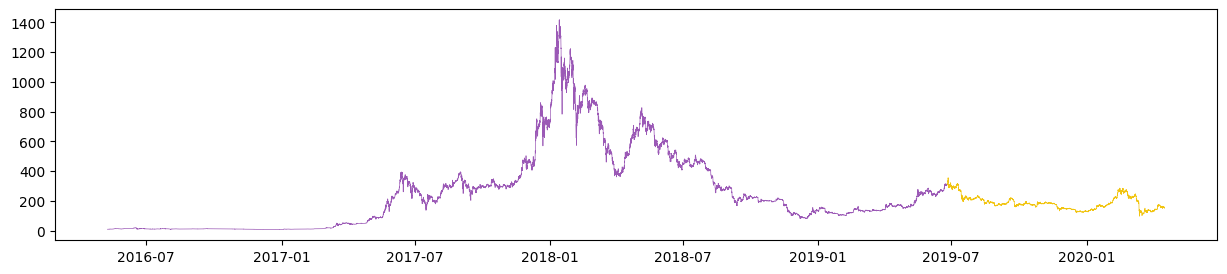

In [18]:
plt.figure(figsize=(15,3))
plt.plot(df['Close'][:split],label='Train',linewidth=0.5, color = "#9b59b6")
plt.plot(df['Close'][split:],label='Test',linewidth=0.5, color = "#f1c40f")

Purple is our training data and Yellow is our testing data

<H2>Model Building</H2>

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import *

In [20]:
model = Sequential()
model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2]))) # shape 240X1
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(X_train,y_train, epochs=5, batch_size=100, verbose=1)

Epoch 1/5

275/275 [==============================] - 128s 437ms/step - loss: 0.0021
Epoch 2/5
275/275 [==============================] - 122s 443ms/step - loss: 3.0537e-04
Epoch 3/5
275/275 [==============================] - 137s 498ms/step - loss: 2.5628e-04
Epoch 4/5
275/275 [==============================] - 143s 519ms/step - loss: 2.3555e-04
Epoch 5/5
275/275 [==============================] - 124s 452ms/step - loss: 2.1001e-04


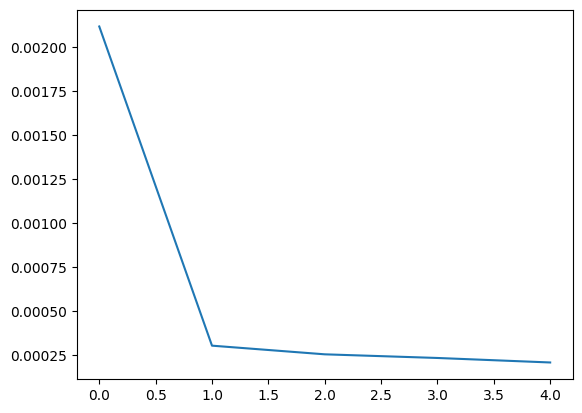

In [23]:
plt.plot(model.history.history['loss'])

<h3>Predict the output</h3>

In [24]:
pred_sc = model.predict(X_test)
pred = sc.inverse_transform(pred_sc) #to get the actual values
y_test_ic = sc.inverse_transform(y_test)

215/215 [==============================] - 16s 66ms/step


<h3>Show the R2 Score and the Predictions according to the actual target value</h3>

The Coefficient of determination (R-squared) = 0.993


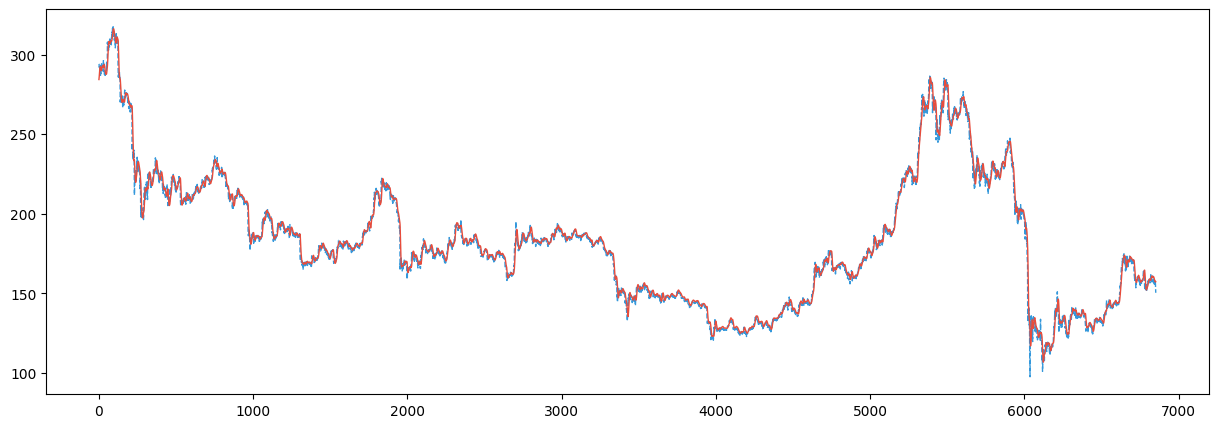

In [25]:
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(pred,y_test_ic)))

plt.figure(figsize=(15,5))
plt.plot(y_test_ic,'--',label='Actual',linewidth=1, color = "#3498db")
plt.plot(pred,label='Predicted',linewidth=1, color = "#e74c3c")

So we have predicted our values and can see that the actual values are in Orange and the predicted values are in Blue and most importantly our model has got an R-score of 0.964 which indeed a very good thing.That means our model has been trained properly

<h3>Future Predictions</h3>

In [26]:
model = Sequential()
model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

In [27]:
#training on entire dataset

X = windows_sc
y = target_sc

model.fit(X,y, epochs=5, batch_size=100, verbose=1)

Epoch 1/5
343/343 [==============================] - 144s 404ms/step - loss: 0.0013
Epoch 2/5
343/343 [==============================] - 165s 481ms/step - loss: 2.1631e-04
Epoch 3/5
343/343 [==============================] - 165s 480ms/step - loss: 1.9868e-04
Epoch 4/5
343/343 [==============================] - 171s 499ms/step - loss: 1.7897e-04
Epoch 5/5
343/343 [==============================] - 175s 511ms/step - loss: 1.6849e-04


Now Using DateTime we will be creating future steps so that we can test our model for future values

In [28]:
from datetime import datetime
from tqdm import tqdm

str_d1 = '2019/04/16' #last date in the original dataset
str_d2 = '2019/05/15'

# convert string to date object
d1 = datetime.strptime(str_d1, "%Y/%m/%d")
d2 = datetime.strptime(str_d2, "%Y/%m/%d")

delta = d2-d1
steps_in_future = delta.days * 24 #hourly difference/steps in the future
print("Steps in future: ",steps_in_future)

Steps in future:  696


Basically there are 1056 hours between these two dates

In [29]:
# Iterative prediction of each future step

f_wind=windows_sc[-1] #last window of the dataset
f_tar=target_sc[-1] #last target of the dataset
new=[]

for i in tqdm(range(steps_in_future)):
    curr = np.append(f_wind[1:],[f_tar]).reshape(-1,1)
    #print(curr,end="\n\n")
    next_pred = model.predict(curr.reshape(1,length,1))
    #pred_ic = sc.inverse_transform(next_pred)
    new.append(next_pred[0][0])
    f_wind = curr
    f_tar=next_pred

  0%|                                                                                          | 0/696 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|                                                                                  | 1/696 [00:01<17:46,  1.53s/it]

1/1 [==============================] - 0s 89ms/step


  0%|▏                                                                                 | 2/696 [00:01<08:41,  1.33it/s]

1/1 [==============================] - 0s 94ms/step


  0%|▎                                                                                 | 3/696 [00:01<05:49,  1.98it/s]

1/1 [==============================] - 0s 94ms/step


  1%|▍                                                                                 | 4/696 [00:02<04:28,  2.57it/s]

1/1 [==============================] - 0s 75ms/step


  1%|▌                                                                                 | 5/696 [00:02<03:37,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


  1%|▋                                                                                 | 6/696 [00:02<03:09,  3.65it/s]

1/1 [==============================] - 0s 93ms/step


  1%|▊                                                                                 | 7/696 [00:02<02:55,  3.92it/s]

1/1 [==============================] - 0s 93ms/step


  1%|▉                                                                                 | 8/696 [00:02<02:44,  4.18it/s]

1/1 [==============================] - 0s 92ms/step


  1%|█                                                                                 | 9/696 [00:03<02:35,  4.41it/s]

1/1 [==============================] - 0s 96ms/step


  1%|█▏                                                                               | 10/696 [00:03<02:33,  4.47it/s]

1/1 [==============================] - 0s 93ms/step


  2%|█▎                                                                               | 11/696 [00:03<02:28,  4.60it/s]

1/1 [==============================] - 0s 91ms/step


  2%|█▍                                                                               | 12/696 [00:03<02:25,  4.69it/s]

1/1 [==============================] - 0s 92ms/step


  2%|█▌                                                                               | 13/696 [00:03<02:22,  4.81it/s]

1/1 [==============================] - 0s 83ms/step


  2%|█▋                                                                               | 14/696 [00:04<02:21,  4.83it/s]

1/1 [==============================] - 0s 93ms/step


  2%|█▋                                                                               | 15/696 [00:04<02:22,  4.79it/s]

1/1 [==============================] - 0s 93ms/step


  2%|█▊                                                                               | 16/696 [00:04<02:22,  4.77it/s]

1/1 [==============================] - 0s 83ms/step


  2%|█▉                                                                               | 17/696 [00:04<02:20,  4.82it/s]

1/1 [==============================] - 0s 89ms/step


  3%|██                                                                               | 18/696 [00:05<02:17,  4.93it/s]

1/1 [==============================] - 0s 91ms/step


  3%|██▏                                                                              | 19/696 [00:05<02:18,  4.90it/s]

1/1 [==============================] - 0s 93ms/step


  3%|██▎                                                                              | 20/696 [00:05<02:19,  4.86it/s]

1/1 [==============================] - 0s 93ms/step


  3%|██▍                                                                              | 21/696 [00:05<02:19,  4.83it/s]

1/1 [==============================] - 0s 80ms/step


  3%|██▌                                                                              | 22/696 [00:05<02:17,  4.92it/s]

1/1 [==============================] - 0s 96ms/step


  3%|██▋                                                                              | 23/696 [00:06<02:20,  4.80it/s]

1/1 [==============================] - 0s 93ms/step


  3%|██▊                                                                              | 24/696 [00:06<02:19,  4.82it/s]

1/1 [==============================] - 0s 96ms/step


  4%|██▉                                                                              | 25/696 [00:06<02:17,  4.87it/s]

1/1 [==============================] - 0s 89ms/step


  4%|███                                                                              | 26/696 [00:06<02:16,  4.89it/s]

1/1 [==============================] - 0s 92ms/step


  4%|███▏                                                                             | 27/696 [00:06<02:15,  4.94it/s]

1/1 [==============================] - 0s 91ms/step


  4%|███▎                                                                             | 28/696 [00:07<02:18,  4.83it/s]

1/1 [==============================] - 0s 79ms/step


  4%|███▍                                                                             | 29/696 [00:07<02:16,  4.89it/s]

1/1 [==============================] - 0s 89ms/step


  4%|███▍                                                                             | 30/696 [00:07<02:15,  4.92it/s]

1/1 [==============================] - 0s 90ms/step


  4%|███▌                                                                             | 31/696 [00:07<02:15,  4.89it/s]

1/1 [==============================] - 0s 89ms/step


  5%|███▋                                                                             | 32/696 [00:07<02:15,  4.91it/s]

1/1 [==============================] - 0s 74ms/step


  5%|███▊                                                                             | 33/696 [00:08<02:13,  4.97it/s]

1/1 [==============================] - 0s 87ms/step


  5%|███▉                                                                             | 34/696 [00:08<02:14,  4.91it/s]

1/1 [==============================] - 0s 89ms/step


  5%|████                                                                             | 35/696 [00:08<02:13,  4.95it/s]

1/1 [==============================] - 0s 90ms/step


  5%|████▏                                                                            | 36/696 [00:08<02:14,  4.89it/s]

1/1 [==============================] - 0s 92ms/step


  5%|████▎                                                                            | 37/696 [00:08<02:13,  4.94it/s]

1/1 [==============================] - 0s 95ms/step


  5%|████▍                                                                            | 38/696 [00:09<02:15,  4.84it/s]

1/1 [==============================] - 0s 93ms/step


  6%|████▌                                                                            | 39/696 [00:09<02:16,  4.83it/s]

1/1 [==============================] - 0s 99ms/step


  6%|████▋                                                                            | 40/696 [00:09<02:19,  4.69it/s]

1/1 [==============================] - 0s 96ms/step


  6%|████▊                                                                            | 41/696 [00:09<02:22,  4.61it/s]

1/1 [==============================] - 0s 86ms/step


  6%|████▉                                                                            | 42/696 [00:09<02:20,  4.65it/s]

1/1 [==============================] - 0s 84ms/step


  6%|█████                                                                            | 43/696 [00:10<02:18,  4.70it/s]

1/1 [==============================] - 0s 95ms/step


  6%|█████                                                                            | 44/696 [00:10<02:19,  4.69it/s]

1/1 [==============================] - 0s 92ms/step


  6%|█████▏                                                                           | 45/696 [00:10<02:17,  4.74it/s]

1/1 [==============================] - 0s 91ms/step


  7%|█████▎                                                                           | 46/696 [00:10<02:17,  4.72it/s]

1/1 [==============================] - 0s 87ms/step


  7%|█████▍                                                                           | 47/696 [00:11<02:16,  4.75it/s]

1/1 [==============================] - 0s 89ms/step


  7%|█████▌                                                                           | 48/696 [00:11<02:13,  4.86it/s]

1/1 [==============================] - 0s 89ms/step


  7%|█████▋                                                                           | 49/696 [00:11<02:13,  4.85it/s]

1/1 [==============================] - 0s 92ms/step


  7%|█████▊                                                                           | 50/696 [00:11<02:13,  4.86it/s]

1/1 [==============================] - 0s 89ms/step


  7%|█████▉                                                                           | 51/696 [00:11<02:13,  4.83it/s]

1/1 [==============================] - 0s 93ms/step


  7%|██████                                                                           | 52/696 [00:12<02:13,  4.82it/s]

1/1 [==============================] - 0s 93ms/step


  8%|██████▏                                                                          | 53/696 [00:12<02:14,  4.79it/s]

1/1 [==============================] - 0s 95ms/step


  8%|██████▎                                                                          | 54/696 [00:12<02:12,  4.84it/s]

1/1 [==============================] - 0s 86ms/step


  8%|██████▍                                                                          | 55/696 [00:12<02:11,  4.86it/s]

1/1 [==============================] - 0s 87ms/step


  8%|██████▌                                                                          | 56/696 [00:12<02:11,  4.86it/s]

1/1 [==============================] - 0s 82ms/step


  8%|██████▋                                                                          | 57/696 [00:13<02:09,  4.93it/s]

1/1 [==============================] - 0s 86ms/step


  8%|██████▊                                                                          | 58/696 [00:13<02:08,  4.98it/s]

1/1 [==============================] - 0s 93ms/step


  8%|██████▊                                                                          | 59/696 [00:13<02:09,  4.90it/s]

1/1 [==============================] - 0s 94ms/step


  9%|██████▉                                                                          | 60/696 [00:13<02:11,  4.85it/s]

1/1 [==============================] - 0s 85ms/step


  9%|███████                                                                          | 61/696 [00:13<02:11,  4.85it/s]

1/1 [==============================] - 0s 89ms/step


  9%|███████▏                                                                         | 62/696 [00:14<02:10,  4.84it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███████▎                                                                         | 63/696 [00:14<02:11,  4.82it/s]

1/1 [==============================] - 0s 77ms/step


  9%|███████▍                                                                         | 64/696 [00:14<02:07,  4.94it/s]

1/1 [==============================] - 0s 84ms/step


  9%|███████▌                                                                         | 65/696 [00:14<02:06,  4.97it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███████▋                                                                         | 66/696 [00:14<02:08,  4.89it/s]

1/1 [==============================] - 0s 93ms/step


 10%|███████▊                                                                         | 67/696 [00:15<02:09,  4.86it/s]

1/1 [==============================] - 0s 91ms/step


 10%|███████▉                                                                         | 68/696 [00:15<02:11,  4.78it/s]

1/1 [==============================] - 0s 76ms/step


 10%|████████                                                                         | 69/696 [00:15<02:08,  4.87it/s]

1/1 [==============================] - 0s 86ms/step


 10%|████████▏                                                                        | 70/696 [00:15<02:06,  4.95it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████████▎                                                                        | 71/696 [00:15<02:06,  4.92it/s]

1/1 [==============================] - 0s 94ms/step


 10%|████████▍                                                                        | 72/696 [00:16<02:07,  4.91it/s]

1/1 [==============================] - 0s 91ms/step


 10%|████████▍                                                                        | 73/696 [00:16<02:06,  4.93it/s]

1/1 [==============================] - 0s 83ms/step


 11%|████████▌                                                                        | 74/696 [00:16<02:06,  4.92it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████████▋                                                                        | 75/696 [00:16<02:06,  4.91it/s]

1/1 [==============================] - 0s 91ms/step


 11%|████████▊                                                                        | 76/696 [00:16<02:06,  4.89it/s]

1/1 [==============================] - 0s 91ms/step


 11%|████████▉                                                                        | 77/696 [00:17<02:06,  4.89it/s]

1/1 [==============================] - 0s 82ms/step


 11%|█████████                                                                        | 78/696 [00:17<02:04,  4.98it/s]

1/1 [==============================] - 0s 88ms/step


 11%|█████████▏                                                                       | 79/696 [00:17<02:03,  4.99it/s]

1/1 [==============================] - 0s 92ms/step


 11%|█████████▎                                                                       | 80/696 [00:17<02:07,  4.82it/s]

1/1 [==============================] - 0s 90ms/step


 12%|█████████▍                                                                       | 81/696 [00:17<02:04,  4.92it/s]

1/1 [==============================] - 0s 92ms/step


 12%|█████████▌                                                                       | 82/696 [00:18<02:04,  4.93it/s]

1/1 [==============================] - 0s 93ms/step


 12%|█████████▋                                                                       | 83/696 [00:18<02:05,  4.89it/s]

1/1 [==============================] - 0s 96ms/step


 12%|█████████▊                                                                       | 84/696 [00:18<02:10,  4.69it/s]

1/1 [==============================] - 0s 94ms/step


 12%|█████████▉                                                                       | 85/696 [00:18<02:10,  4.67it/s]

1/1 [==============================] - 0s 96ms/step


 12%|██████████                                                                       | 86/696 [00:19<02:13,  4.56it/s]

1/1 [==============================] - 0s 90ms/step


 12%|██████████▏                                                                      | 87/696 [00:19<02:14,  4.54it/s]

1/1 [==============================] - 0s 93ms/step


 13%|██████████▏                                                                      | 88/696 [00:19<02:11,  4.63it/s]

1/1 [==============================] - 0s 88ms/step


 13%|██████████▎                                                                      | 89/696 [00:19<02:09,  4.70it/s]

1/1 [==============================] - 0s 94ms/step


 13%|██████████▍                                                                      | 90/696 [00:19<02:08,  4.72it/s]

1/1 [==============================] - 0s 90ms/step


 13%|██████████▌                                                                      | 91/696 [00:20<02:08,  4.70it/s]

1/1 [==============================] - 0s 92ms/step


 13%|██████████▋                                                                      | 92/696 [00:20<02:07,  4.73it/s]

1/1 [==============================] - 0s 87ms/step


 13%|██████████▊                                                                      | 93/696 [00:20<02:05,  4.79it/s]

1/1 [==============================] - 0s 93ms/step


 14%|██████████▉                                                                      | 94/696 [00:20<02:06,  4.75it/s]

1/1 [==============================] - 0s 100ms/step


 14%|███████████                                                                      | 95/696 [00:20<02:07,  4.72it/s]

1/1 [==============================] - 0s 92ms/step


 14%|███████████▏                                                                     | 96/696 [00:21<02:05,  4.78it/s]

1/1 [==============================] - 0s 94ms/step


 14%|███████████▎                                                                     | 97/696 [00:21<02:03,  4.84it/s]

1/1 [==============================] - 0s 94ms/step


 14%|███████████▍                                                                     | 98/696 [00:21<02:04,  4.79it/s]

1/1 [==============================] - 0s 85ms/step


 14%|███████████▌                                                                     | 99/696 [00:21<02:01,  4.90it/s]

1/1 [==============================] - 0s 83ms/step


 14%|███████████▍                                                                    | 100/696 [00:21<02:00,  4.94it/s]

1/1 [==============================] - 0s 81ms/step


 15%|███████████▌                                                                    | 101/696 [00:22<01:59,  4.96it/s]

1/1 [==============================] - 0s 86ms/step


 15%|███████████▋                                                                    | 102/696 [00:22<02:01,  4.88it/s]

1/1 [==============================] - 0s 92ms/step


 15%|███████████▊                                                                    | 103/696 [00:22<02:02,  4.85it/s]

1/1 [==============================] - 0s 94ms/step


 15%|███████████▉                                                                    | 104/696 [00:22<02:02,  4.82it/s]

1/1 [==============================] - 0s 87ms/step


 15%|████████████                                                                    | 105/696 [00:22<02:00,  4.90it/s]

1/1 [==============================] - 0s 84ms/step


 15%|████████████▏                                                                   | 106/696 [00:23<02:00,  4.89it/s]

1/1 [==============================] - 0s 91ms/step


 15%|████████████▎                                                                   | 107/696 [00:23<01:59,  4.91it/s]

1/1 [==============================] - 0s 95ms/step


 16%|████████████▍                                                                   | 108/696 [00:23<01:59,  4.93it/s]

1/1 [==============================] - 0s 94ms/step


 16%|████████████▌                                                                   | 109/696 [00:23<02:00,  4.88it/s]

1/1 [==============================] - 0s 95ms/step


 16%|████████████▋                                                                   | 110/696 [00:24<02:01,  4.82it/s]

1/1 [==============================] - 0s 80ms/step


 16%|████████████▊                                                                   | 111/696 [00:24<01:58,  4.93it/s]

1/1 [==============================] - 0s 95ms/step


 16%|████████████▊                                                                   | 112/696 [00:24<01:59,  4.87it/s]

1/1 [==============================] - 0s 88ms/step


 16%|████████████▉                                                                   | 113/696 [00:24<01:59,  4.87it/s]

1/1 [==============================] - 0s 78ms/step


 16%|█████████████                                                                   | 114/696 [00:24<01:59,  4.86it/s]

1/1 [==============================] - 0s 94ms/step


 17%|█████████████▏                                                                  | 115/696 [00:25<01:59,  4.86it/s]

1/1 [==============================] - 0s 91ms/step


 17%|█████████████▎                                                                  | 116/696 [00:25<01:59,  4.84it/s]

1/1 [==============================] - 0s 80ms/step


 17%|█████████████▍                                                                  | 117/696 [00:25<01:58,  4.89it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█████████████▌                                                                  | 118/696 [00:25<01:59,  4.85it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█████████████▋                                                                  | 119/696 [00:25<01:59,  4.83it/s]

1/1 [==============================] - 0s 87ms/step


 17%|█████████████▊                                                                  | 120/696 [00:26<01:57,  4.90it/s]

1/1 [==============================] - 0s 95ms/step


 17%|█████████████▉                                                                  | 121/696 [00:26<01:59,  4.83it/s]

1/1 [==============================] - 0s 92ms/step


 18%|██████████████                                                                  | 122/696 [00:26<01:59,  4.82it/s]

1/1 [==============================] - 0s 94ms/step


 18%|██████████████▏                                                                 | 123/696 [00:26<02:00,  4.76it/s]

1/1 [==============================] - 0s 96ms/step


 18%|██████████████▎                                                                 | 124/696 [00:26<02:00,  4.73it/s]

1/1 [==============================] - 0s 92ms/step


 18%|██████████████▎                                                                 | 125/696 [00:27<02:02,  4.66it/s]

1/1 [==============================] - 0s 95ms/step


 18%|██████████████▍                                                                 | 126/696 [00:27<02:01,  4.69it/s]

1/1 [==============================] - 0s 83ms/step


 18%|██████████████▌                                                                 | 127/696 [00:27<01:57,  4.83it/s]

1/1 [==============================] - 0s 93ms/step


 18%|██████████████▋                                                                 | 128/696 [00:27<01:58,  4.81it/s]

1/1 [==============================] - 0s 92ms/step


 19%|██████████████▊                                                                 | 129/696 [00:27<01:57,  4.81it/s]

1/1 [==============================] - 0s 85ms/step


 19%|██████████████▉                                                                 | 130/696 [00:28<01:55,  4.88it/s]

1/1 [==============================] - 0s 94ms/step


 19%|███████████████                                                                 | 131/696 [00:28<01:54,  4.92it/s]

1/1 [==============================] - 0s 84ms/step


 19%|███████████████▏                                                                | 132/696 [00:28<01:54,  4.93it/s]

1/1 [==============================] - 0s 82ms/step


 19%|███████████████▎                                                                | 133/696 [00:28<01:53,  4.98it/s]

1/1 [==============================] - 0s 92ms/step


 19%|███████████████▍                                                                | 134/696 [00:28<01:53,  4.94it/s]

1/1 [==============================] - 0s 91ms/step


 19%|███████████████▌                                                                | 135/696 [00:29<01:53,  4.94it/s]

1/1 [==============================] - 0s 93ms/step


 20%|███████████████▋                                                                | 136/696 [00:29<01:56,  4.82it/s]

1/1 [==============================] - 0s 91ms/step


 20%|███████████████▋                                                                | 137/696 [00:29<01:56,  4.81it/s]

1/1 [==============================] - 0s 92ms/step


 20%|███████████████▊                                                                | 138/696 [00:29<01:55,  4.83it/s]

1/1 [==============================] - 0s 89ms/step


 20%|███████████████▉                                                                | 139/696 [00:30<01:54,  4.85it/s]

1/1 [==============================] - 0s 94ms/step


 20%|████████████████                                                                | 140/696 [00:30<01:55,  4.81it/s]

1/1 [==============================] - 0s 93ms/step


 20%|████████████████▏                                                               | 141/696 [00:30<01:55,  4.81it/s]

1/1 [==============================] - 0s 93ms/step


 20%|████████████████▎                                                               | 142/696 [00:30<01:52,  4.91it/s]

1/1 [==============================] - 0s 94ms/step


 21%|████████████████▍                                                               | 143/696 [00:30<01:53,  4.88it/s]

1/1 [==============================] - 0s 95ms/step


 21%|████████████████▌                                                               | 144/696 [00:31<01:54,  4.81it/s]

1/1 [==============================] - 0s 94ms/step


 21%|████████████████▋                                                               | 145/696 [00:31<01:53,  4.85it/s]

1/1 [==============================] - 0s 96ms/step


 21%|████████████████▊                                                               | 146/696 [00:31<01:53,  4.84it/s]

1/1 [==============================] - 0s 94ms/step


 21%|████████████████▉                                                               | 147/696 [00:31<01:54,  4.79it/s]

1/1 [==============================] - 0s 93ms/step


 21%|█████████████████                                                               | 148/696 [00:31<01:53,  4.84it/s]

1/1 [==============================] - 0s 92ms/step


 21%|█████████████████▏                                                              | 149/696 [00:32<01:53,  4.82it/s]

1/1 [==============================] - 0s 92ms/step


 22%|█████████████████▏                                                              | 150/696 [00:32<01:53,  4.79it/s]

1/1 [==============================] - 0s 93ms/step


 22%|█████████████████▎                                                              | 151/696 [00:32<01:53,  4.82it/s]

1/1 [==============================] - 0s 85ms/step


 22%|█████████████████▍                                                              | 152/696 [00:32<01:52,  4.84it/s]

1/1 [==============================] - 0s 96ms/step


 22%|█████████████████▌                                                              | 153/696 [00:32<01:53,  4.77it/s]

1/1 [==============================] - 0s 94ms/step


 22%|█████████████████▋                                                              | 154/696 [00:33<01:53,  4.77it/s]

1/1 [==============================] - 0s 94ms/step


 22%|█████████████████▊                                                              | 155/696 [00:33<01:52,  4.81it/s]

1/1 [==============================] - 0s 84ms/step


 22%|█████████████████▉                                                              | 156/696 [00:33<01:51,  4.83it/s]

1/1 [==============================] - 0s 95ms/step


 23%|██████████████████                                                              | 157/696 [00:33<01:53,  4.74it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██████████████████▏                                                             | 158/696 [00:33<01:53,  4.74it/s]

1/1 [==============================] - 0s 92ms/step


 23%|██████████████████▎                                                             | 159/696 [00:34<01:51,  4.80it/s]

1/1 [==============================] - 0s 96ms/step


 23%|██████████████████▍                                                             | 160/696 [00:34<01:50,  4.83it/s]

1/1 [==============================] - 0s 79ms/step


 23%|██████████████████▌                                                             | 161/696 [00:34<01:47,  4.98it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██████████████████▌                                                             | 162/696 [00:34<01:47,  4.97it/s]

1/1 [==============================] - 0s 92ms/step


 23%|██████████████████▋                                                             | 163/696 [00:34<01:48,  4.92it/s]

1/1 [==============================] - 0s 94ms/step


 24%|██████████████████▊                                                             | 164/696 [00:35<01:47,  4.94it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██████████████████▉                                                             | 165/696 [00:35<01:47,  4.93it/s]

1/1 [==============================] - 0s 94ms/step


 24%|███████████████████                                                             | 166/696 [00:35<01:48,  4.91it/s]

1/1 [==============================] - 0s 93ms/step


 24%|███████████████████▏                                                            | 167/696 [00:35<01:48,  4.86it/s]

1/1 [==============================] - 0s 92ms/step


 24%|███████████████████▎                                                            | 168/696 [00:35<01:46,  4.97it/s]

1/1 [==============================] - 0s 94ms/step


 24%|███████████████████▍                                                            | 169/696 [00:36<01:47,  4.89it/s]

1/1 [==============================] - 0s 93ms/step


 24%|███████████████████▌                                                            | 170/696 [00:36<01:51,  4.72it/s]

1/1 [==============================] - 0s 93ms/step


 25%|███████████████████▋                                                            | 171/696 [00:36<01:50,  4.77it/s]

1/1 [==============================] - 0s 92ms/step


 25%|███████████████████▊                                                            | 172/696 [00:36<01:50,  4.75it/s]

1/1 [==============================] - 0s 96ms/step


 25%|███████████████████▉                                                            | 173/696 [00:37<01:49,  4.77it/s]

1/1 [==============================] - 0s 93ms/step


 25%|████████████████████                                                            | 174/696 [00:37<01:50,  4.75it/s]

1/1 [==============================] - 0s 93ms/step


 25%|████████████████████                                                            | 175/696 [00:37<01:48,  4.78it/s]

1/1 [==============================] - 0s 94ms/step


 25%|████████████████████▏                                                           | 176/696 [00:37<01:48,  4.77it/s]

1/1 [==============================] - 0s 85ms/step


 25%|████████████████████▎                                                           | 177/696 [00:37<01:44,  4.99it/s]

1/1 [==============================] - 0s 83ms/step


 26%|████████████████████▍                                                           | 178/696 [00:38<01:43,  4.99it/s]

1/1 [==============================] - 0s 93ms/step


 26%|████████████████████▌                                                           | 179/696 [00:38<01:44,  4.94it/s]

1/1 [==============================] - 0s 96ms/step


 26%|████████████████████▋                                                           | 180/696 [00:38<01:45,  4.88it/s]

1/1 [==============================] - 0s 97ms/step


 26%|████████████████████▊                                                           | 181/696 [00:38<01:44,  4.91it/s]

1/1 [==============================] - 0s 94ms/step


 26%|████████████████████▉                                                           | 182/696 [00:38<01:46,  4.83it/s]

1/1 [==============================] - 0s 78ms/step


 26%|█████████████████████                                                           | 183/696 [00:39<01:44,  4.89it/s]

1/1 [==============================] - 0s 91ms/step


 26%|█████████████████████▏                                                          | 184/696 [00:39<01:44,  4.89it/s]

1/1 [==============================] - 0s 91ms/step


 27%|█████████████████████▎                                                          | 185/696 [00:39<01:44,  4.87it/s]

1/1 [==============================] - 0s 77ms/step


 27%|█████████████████████▍                                                          | 186/696 [00:39<01:44,  4.90it/s]

1/1 [==============================] - 0s 91ms/step


 27%|█████████████████████▍                                                          | 187/696 [00:39<01:43,  4.91it/s]

1/1 [==============================] - 0s 85ms/step


 27%|█████████████████████▌                                                          | 188/696 [00:40<01:43,  4.89it/s]

1/1 [==============================] - 0s 90ms/step


 27%|█████████████████████▋                                                          | 189/696 [00:40<01:42,  4.93it/s]

1/1 [==============================] - 0s 88ms/step


 27%|█████████████████████▊                                                          | 190/696 [00:40<01:43,  4.91it/s]

1/1 [==============================] - 0s 91ms/step


 27%|█████████████████████▉                                                          | 191/696 [00:40<01:44,  4.82it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██████████████████████                                                          | 192/696 [00:40<01:46,  4.75it/s]

1/1 [==============================] - 0s 92ms/step


 28%|██████████████████████▏                                                         | 193/696 [00:41<01:46,  4.70it/s]

1/1 [==============================] - 0s 94ms/step


 28%|██████████████████████▎                                                         | 194/696 [00:41<01:44,  4.78it/s]

1/1 [==============================] - 0s 79ms/step


 28%|██████████████████████▍                                                         | 195/696 [00:41<01:41,  4.95it/s]

1/1 [==============================] - 0s 94ms/step


 28%|██████████████████████▌                                                         | 196/696 [00:41<01:42,  4.88it/s]

1/1 [==============================] - 0s 94ms/step


 28%|██████████████████████▋                                                         | 197/696 [00:41<01:42,  4.89it/s]

1/1 [==============================] - 0s 90ms/step


 28%|██████████████████████▊                                                         | 198/696 [00:42<01:42,  4.86it/s]

1/1 [==============================] - 0s 94ms/step


 29%|██████████████████████▊                                                         | 199/696 [00:42<01:41,  4.88it/s]

1/1 [==============================] - 0s 89ms/step


 29%|██████████████████████▉                                                         | 200/696 [00:42<01:40,  4.93it/s]

1/1 [==============================] - 0s 76ms/step


 29%|███████████████████████                                                         | 201/696 [00:42<01:39,  4.98it/s]

1/1 [==============================] - 0s 91ms/step


 29%|███████████████████████▏                                                        | 202/696 [00:42<01:39,  4.95it/s]

1/1 [==============================] - 0s 93ms/step


 29%|███████████████████████▎                                                        | 203/696 [00:43<01:39,  4.94it/s]

1/1 [==============================] - 0s 93ms/step


 29%|███████████████████████▍                                                        | 204/696 [00:43<01:42,  4.82it/s]

1/1 [==============================] - 0s 93ms/step


 29%|███████████████████████▌                                                        | 205/696 [00:43<01:42,  4.80it/s]

1/1 [==============================] - 0s 90ms/step


 30%|███████████████████████▋                                                        | 206/696 [00:43<01:42,  4.80it/s]

1/1 [==============================] - 0s 78ms/step


 30%|███████████████████████▊                                                        | 207/696 [00:44<01:38,  4.95it/s]

1/1 [==============================] - 0s 87ms/step


 30%|███████████████████████▉                                                        | 208/696 [00:44<01:39,  4.93it/s]

1/1 [==============================] - 0s 102ms/step


 30%|████████████████████████                                                        | 209/696 [00:44<01:40,  4.85it/s]

1/1 [==============================] - 0s 88ms/step


 30%|████████████████████████▏                                                       | 210/696 [00:44<01:40,  4.83it/s]

1/1 [==============================] - 0s 93ms/step


 30%|████████████████████████▎                                                       | 211/696 [00:44<01:40,  4.83it/s]

1/1 [==============================] - 0s 87ms/step


 30%|████████████████████████▎                                                       | 212/696 [00:45<01:40,  4.83it/s]

1/1 [==============================] - 0s 88ms/step


 31%|████████████████████████▍                                                       | 213/696 [00:45<01:38,  4.91it/s]

1/1 [==============================] - 0s 79ms/step


 31%|████████████████████████▌                                                       | 214/696 [00:45<01:35,  5.03it/s]

1/1 [==============================] - 0s 89ms/step


 31%|████████████████████████▋                                                       | 215/696 [00:45<01:37,  4.95it/s]

1/1 [==============================] - 0s 83ms/step


 31%|████████████████████████▊                                                       | 216/696 [00:45<01:38,  4.86it/s]

1/1 [==============================] - 0s 91ms/step


 31%|████████████████████████▉                                                       | 217/696 [00:46<01:38,  4.87it/s]

1/1 [==============================] - 0s 79ms/step


 31%|█████████████████████████                                                       | 218/696 [00:46<01:35,  5.00it/s]

1/1 [==============================] - 0s 94ms/step


 31%|█████████████████████████▏                                                      | 219/696 [00:46<01:36,  4.95it/s]

1/1 [==============================] - 0s 90ms/step


 32%|█████████████████████████▎                                                      | 220/696 [00:46<01:36,  4.94it/s]

1/1 [==============================] - 0s 90ms/step


 32%|█████████████████████████▍                                                      | 221/696 [00:46<01:34,  5.01it/s]

1/1 [==============================] - 0s 95ms/step


 32%|█████████████████████████▌                                                      | 222/696 [00:47<01:35,  4.98it/s]

1/1 [==============================] - 0s 96ms/step


 32%|█████████████████████████▋                                                      | 223/696 [00:47<01:36,  4.90it/s]

1/1 [==============================] - 0s 96ms/step


 32%|█████████████████████████▋                                                      | 224/696 [00:47<01:37,  4.84it/s]

1/1 [==============================] - 0s 100ms/step


 32%|█████████████████████████▊                                                      | 225/696 [00:47<01:38,  4.77it/s]

1/1 [==============================] - 0s 99ms/step


 32%|█████████████████████████▉                                                      | 226/696 [00:47<01:41,  4.65it/s]

1/1 [==============================] - 0s 97ms/step


 33%|██████████████████████████                                                      | 227/696 [00:48<01:41,  4.64it/s]

1/1 [==============================] - 0s 93ms/step


 33%|██████████████████████████▏                                                     | 228/696 [00:48<01:40,  4.68it/s]

1/1 [==============================] - 0s 94ms/step


 33%|██████████████████████████▎                                                     | 229/696 [00:48<01:37,  4.81it/s]

1/1 [==============================] - 0s 93ms/step


 33%|██████████████████████████▍                                                     | 230/696 [00:48<01:37,  4.78it/s]

1/1 [==============================] - 0s 94ms/step


 33%|██████████████████████████▌                                                     | 231/696 [00:48<01:36,  4.84it/s]

1/1 [==============================] - 0s 90ms/step


 33%|██████████████████████████▋                                                     | 232/696 [00:49<01:35,  4.84it/s]

1/1 [==============================] - 0s 78ms/step


 33%|██████████████████████████▊                                                     | 233/696 [00:49<01:31,  5.07it/s]

1/1 [==============================] - 0s 80ms/step


 34%|██████████████████████████▉                                                     | 234/696 [00:49<01:31,  5.07it/s]

1/1 [==============================] - 0s 88ms/step


 34%|███████████████████████████                                                     | 235/696 [00:49<01:31,  5.03it/s]

1/1 [==============================] - 0s 93ms/step


 34%|███████████████████████████▏                                                    | 236/696 [00:49<01:32,  4.98it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███████████████████████████▏                                                    | 237/696 [00:50<01:33,  4.89it/s]

1/1 [==============================] - 0s 94ms/step


 34%|███████████████████████████▎                                                    | 238/696 [00:50<01:35,  4.78it/s]

1/1 [==============================] - 0s 86ms/step


 34%|███████████████████████████▍                                                    | 239/696 [00:50<01:32,  4.93it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███████████████████████████▌                                                    | 240/696 [00:50<01:31,  4.99it/s]

1/1 [==============================] - 0s 95ms/step


 35%|███████████████████████████▋                                                    | 241/696 [00:50<01:31,  5.00it/s]

1/1 [==============================] - 0s 93ms/step


 35%|███████████████████████████▊                                                    | 242/696 [00:51<01:32,  4.89it/s]

1/1 [==============================] - 0s 96ms/step


 35%|███████████████████████████▉                                                    | 243/696 [00:51<01:32,  4.89it/s]

1/1 [==============================] - 0s 86ms/step


 35%|████████████████████████████                                                    | 244/696 [00:51<01:30,  5.00it/s]

1/1 [==============================] - 0s 92ms/step


 35%|████████████████████████████▏                                                   | 245/696 [00:51<01:31,  4.90it/s]

1/1 [==============================] - 0s 97ms/step


 35%|████████████████████████████▎                                                   | 246/696 [00:51<01:32,  4.88it/s]

1/1 [==============================] - 0s 82ms/step


 35%|████████████████████████████▍                                                   | 247/696 [00:52<01:31,  4.91it/s]

1/1 [==============================] - 0s 94ms/step


 36%|████████████████████████████▌                                                   | 248/696 [00:52<01:31,  4.90it/s]

1/1 [==============================] - 0s 92ms/step


 36%|████████████████████████████▌                                                   | 249/696 [00:52<01:31,  4.87it/s]

1/1 [==============================] - 0s 93ms/step


 36%|████████████████████████████▋                                                   | 250/696 [00:52<01:33,  4.75it/s]

1/1 [==============================] - 0s 77ms/step


 36%|████████████████████████████▊                                                   | 251/696 [00:53<01:29,  4.96it/s]

1/1 [==============================] - 0s 88ms/step


 36%|████████████████████████████▉                                                   | 252/696 [00:53<01:30,  4.92it/s]

1/1 [==============================] - 0s 95ms/step


 36%|█████████████████████████████                                                   | 253/696 [00:53<01:28,  4.99it/s]

1/1 [==============================] - 0s 95ms/step


 36%|█████████████████████████████▏                                                  | 254/696 [00:53<01:30,  4.89it/s]

1/1 [==============================] - 0s 87ms/step


 37%|█████████████████████████████▎                                                  | 255/696 [00:53<01:30,  4.86it/s]

1/1 [==============================] - 0s 93ms/step


 37%|█████████████████████████████▍                                                  | 256/696 [00:54<01:30,  4.87it/s]

1/1 [==============================] - 0s 82ms/step


 37%|█████████████████████████████▌                                                  | 257/696 [00:54<01:29,  4.89it/s]

1/1 [==============================] - 0s 87ms/step


 37%|█████████████████████████████▋                                                  | 258/696 [00:54<01:29,  4.91it/s]

1/1 [==============================] - 0s 94ms/step


 37%|█████████████████████████████▊                                                  | 259/696 [00:54<01:27,  5.00it/s]

1/1 [==============================] - 0s 94ms/step


 37%|█████████████████████████████▉                                                  | 260/696 [00:54<01:28,  4.91it/s]

1/1 [==============================] - 0s 95ms/step


 38%|██████████████████████████████                                                  | 261/696 [00:55<01:31,  4.74it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████████████████████                                                  | 262/696 [00:55<01:31,  4.76it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████████████████████▏                                                 | 263/696 [00:55<01:30,  4.80it/s]

1/1 [==============================] - 0s 79ms/step


 38%|██████████████████████████████▎                                                 | 264/696 [00:55<01:26,  5.00it/s]

1/1 [==============================] - 0s 75ms/step


 38%|██████████████████████████████▍                                                 | 265/696 [00:55<01:25,  5.06it/s]

1/1 [==============================] - 0s 90ms/step


 38%|██████████████████████████████▌                                                 | 266/696 [00:56<01:25,  5.03it/s]

1/1 [==============================] - 0s 93ms/step


 38%|██████████████████████████████▋                                                 | 267/696 [00:56<01:26,  4.97it/s]

1/1 [==============================] - 0s 95ms/step


 39%|██████████████████████████████▊                                                 | 268/696 [00:56<01:27,  4.90it/s]

1/1 [==============================] - 0s 74ms/step


 39%|██████████████████████████████▉                                                 | 269/696 [00:56<01:23,  5.09it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███████████████████████████████                                                 | 270/696 [00:56<01:25,  5.00it/s]

1/1 [==============================] - 0s 95ms/step


 39%|███████████████████████████████▏                                                | 271/696 [00:57<01:26,  4.93it/s]

1/1 [==============================] - 0s 93ms/step


 39%|███████████████████████████████▎                                                | 272/696 [00:57<01:27,  4.86it/s]

1/1 [==============================] - 0s 94ms/step


 39%|███████████████████████████████▍                                                | 273/696 [00:57<01:25,  4.93it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███████████████████████████████▍                                                | 274/696 [00:57<01:25,  4.95it/s]

1/1 [==============================] - 0s 91ms/step


 40%|███████████████████████████████▌                                                | 275/696 [00:57<01:26,  4.86it/s]

1/1 [==============================] - 0s 78ms/step


 40%|███████████████████████████████▋                                                | 276/696 [00:58<01:24,  4.99it/s]

1/1 [==============================] - 0s 88ms/step


 40%|███████████████████████████████▊                                                | 277/696 [00:58<01:24,  4.99it/s]

1/1 [==============================] - 0s 97ms/step


 40%|███████████████████████████████▉                                                | 278/696 [00:58<01:24,  4.94it/s]

1/1 [==============================] - 0s 80ms/step


 40%|████████████████████████████████                                                | 279/696 [00:58<01:23,  5.01it/s]

1/1 [==============================] - 0s 93ms/step


 40%|████████████████████████████████▏                                               | 280/696 [00:58<01:24,  4.91it/s]

1/1 [==============================] - 0s 81ms/step


 40%|████████████████████████████████▎                                               | 281/696 [00:59<01:22,  5.01it/s]

1/1 [==============================] - 0s 94ms/step


 41%|████████████████████████████████▍                                               | 282/696 [00:59<01:24,  4.90it/s]

1/1 [==============================] - 0s 92ms/step


 41%|████████████████████████████████▌                                               | 283/696 [00:59<01:24,  4.89it/s]

1/1 [==============================] - 0s 82ms/step


 41%|████████████████████████████████▋                                               | 284/696 [00:59<01:24,  4.88it/s]

1/1 [==============================] - 0s 90ms/step


 41%|████████████████████████████████▊                                               | 285/696 [00:59<01:24,  4.85it/s]

1/1 [==============================] - 0s 92ms/step


 41%|████████████████████████████████▊                                               | 286/696 [01:00<01:24,  4.85it/s]

1/1 [==============================] - 0s 90ms/step


 41%|████████████████████████████████▉                                               | 287/696 [01:00<01:24,  4.86it/s]

1/1 [==============================] - 0s 86ms/step


 41%|█████████████████████████████████                                               | 288/696 [01:00<01:23,  4.89it/s]

1/1 [==============================] - 0s 91ms/step


 42%|█████████████████████████████████▏                                              | 289/696 [01:00<01:24,  4.83it/s]

1/1 [==============================] - 0s 83ms/step


 42%|█████████████████████████████████▎                                              | 290/696 [01:00<01:22,  4.93it/s]

1/1 [==============================] - 0s 95ms/step


 42%|█████████████████████████████████▍                                              | 291/696 [01:01<01:22,  4.89it/s]

1/1 [==============================] - 0s 95ms/step


 42%|█████████████████████████████████▌                                              | 292/696 [01:01<01:22,  4.89it/s]

1/1 [==============================] - 0s 89ms/step


 42%|█████████████████████████████████▋                                              | 293/696 [01:01<01:22,  4.89it/s]

1/1 [==============================] - 0s 90ms/step


 42%|█████████████████████████████████▊                                              | 294/696 [01:01<01:23,  4.80it/s]

1/1 [==============================] - 0s 91ms/step


 42%|█████████████████████████████████▉                                              | 295/696 [01:01<01:24,  4.73it/s]

1/1 [==============================] - 0s 88ms/step


 43%|██████████████████████████████████                                              | 296/696 [01:02<01:23,  4.81it/s]

1/1 [==============================] - 0s 93ms/step


 43%|██████████████████████████████████▏                                             | 297/696 [01:02<01:23,  4.76it/s]

1/1 [==============================] - 0s 93ms/step


 43%|██████████████████████████████████▎                                             | 298/696 [01:02<01:22,  4.84it/s]

1/1 [==============================] - 0s 92ms/step


 43%|██████████████████████████████████▎                                             | 299/696 [01:02<01:21,  4.88it/s]

1/1 [==============================] - 0s 91ms/step


 43%|██████████████████████████████████▍                                             | 300/696 [01:03<01:20,  4.94it/s]

1/1 [==============================] - 0s 93ms/step


 43%|██████████████████████████████████▌                                             | 301/696 [01:03<01:19,  4.95it/s]

1/1 [==============================] - 0s 74ms/step


 43%|██████████████████████████████████▋                                             | 302/696 [01:03<01:17,  5.10it/s]

1/1 [==============================] - 0s 93ms/step


 44%|██████████████████████████████████▊                                             | 303/696 [01:03<01:18,  4.98it/s]

1/1 [==============================] - 0s 92ms/step


 44%|██████████████████████████████████▉                                             | 304/696 [01:03<01:19,  4.95it/s]

1/1 [==============================] - 0s 88ms/step


 44%|███████████████████████████████████                                             | 305/696 [01:04<01:20,  4.88it/s]

1/1 [==============================] - 0s 79ms/step


 44%|███████████████████████████████████▏                                            | 306/696 [01:04<01:19,  4.93it/s]

1/1 [==============================] - 0s 90ms/step


 44%|███████████████████████████████████▎                                            | 307/696 [01:04<01:18,  4.95it/s]

1/1 [==============================] - 0s 90ms/step


 44%|███████████████████████████████████▍                                            | 308/696 [01:04<01:17,  4.99it/s]

1/1 [==============================] - 0s 83ms/step


 44%|███████████████████████████████████▌                                            | 309/696 [01:04<01:16,  5.06it/s]

1/1 [==============================] - 0s 92ms/step


 45%|███████████████████████████████████▋                                            | 310/696 [01:05<01:17,  4.97it/s]

1/1 [==============================] - 0s 93ms/step


 45%|███████████████████████████████████▋                                            | 311/696 [01:05<01:18,  4.89it/s]

1/1 [==============================] - 0s 84ms/step


 45%|███████████████████████████████████▊                                            | 312/696 [01:05<01:18,  4.87it/s]

1/1 [==============================] - 0s 91ms/step


 45%|███████████████████████████████████▉                                            | 313/696 [01:05<01:19,  4.84it/s]

1/1 [==============================] - 0s 93ms/step


 45%|████████████████████████████████████                                            | 314/696 [01:05<01:18,  4.86it/s]

1/1 [==============================] - 0s 95ms/step


 45%|████████████████████████████████████▏                                           | 315/696 [01:06<01:19,  4.81it/s]

1/1 [==============================] - 0s 96ms/step


 45%|████████████████████████████████████▎                                           | 316/696 [01:06<01:19,  4.77it/s]

1/1 [==============================] - 0s 95ms/step


 46%|████████████████████████████████████▍                                           | 317/696 [01:06<01:18,  4.81it/s]

1/1 [==============================] - 0s 92ms/step


 46%|████████████████████████████████████▌                                           | 318/696 [01:06<01:20,  4.71it/s]

1/1 [==============================] - 0s 92ms/step


 46%|████████████████████████████████████▋                                           | 319/696 [01:06<01:18,  4.80it/s]

1/1 [==============================] - 0s 90ms/step


 46%|████████████████████████████████████▊                                           | 320/696 [01:07<01:17,  4.86it/s]

1/1 [==============================] - 0s 93ms/step


 46%|████████████████████████████████████▉                                           | 321/696 [01:07<01:17,  4.84it/s]

1/1 [==============================] - 0s 73ms/step


 46%|█████████████████████████████████████                                           | 322/696 [01:07<01:15,  4.98it/s]

1/1 [==============================] - 0s 93ms/step


 46%|█████████████████████████████████████▏                                          | 323/696 [01:07<01:14,  5.01it/s]

1/1 [==============================] - 0s 76ms/step


 47%|█████████████████████████████████████▏                                          | 324/696 [01:07<01:12,  5.10it/s]

1/1 [==============================] - 0s 93ms/step


 47%|█████████████████████████████████████▎                                          | 325/696 [01:08<01:13,  5.02it/s]

1/1 [==============================] - 0s 95ms/step


 47%|█████████████████████████████████████▍                                          | 326/696 [01:08<01:15,  4.92it/s]

1/1 [==============================] - 0s 93ms/step


 47%|█████████████████████████████████████▌                                          | 327/696 [01:08<01:15,  4.88it/s]

1/1 [==============================] - 0s 76ms/step


 47%|█████████████████████████████████████▋                                          | 328/696 [01:08<01:11,  5.12it/s]

1/1 [==============================] - 0s 71ms/step


 47%|█████████████████████████████████████▊                                          | 329/696 [01:08<01:08,  5.34it/s]

1/1 [==============================] - 0s 73ms/step


 47%|█████████████████████████████████████▉                                          | 330/696 [01:09<01:06,  5.47it/s]

1/1 [==============================] - 0s 66ms/step


 48%|██████████████████████████████████████                                          | 331/696 [01:09<01:03,  5.72it/s]

1/1 [==============================] - 0s 73ms/step


 48%|██████████████████████████████████████▏                                         | 332/696 [01:09<01:07,  5.36it/s]

1/1 [==============================] - 0s 96ms/step


 48%|██████████████████████████████████████▎                                         | 333/696 [01:09<01:12,  5.04it/s]

1/1 [==============================] - 0s 71ms/step


 48%|██████████████████████████████████████▍                                         | 334/696 [01:09<01:10,  5.16it/s]

1/1 [==============================] - 0s 81ms/step


 48%|██████████████████████████████████████▌                                         | 335/696 [01:09<01:07,  5.35it/s]

1/1 [==============================] - 0s 91ms/step


 48%|██████████████████████████████████████▌                                         | 336/696 [01:10<01:07,  5.35it/s]

1/1 [==============================] - 0s 92ms/step


 48%|██████████████████████████████████████▋                                         | 337/696 [01:10<01:10,  5.12it/s]

1/1 [==============================] - 0s 82ms/step


 49%|██████████████████████████████████████▊                                         | 338/696 [01:10<01:10,  5.10it/s]

1/1 [==============================] - 0s 86ms/step


 49%|██████████████████████████████████████▉                                         | 339/696 [01:10<01:10,  5.08it/s]

1/1 [==============================] - 0s 89ms/step


 49%|███████████████████████████████████████                                         | 340/696 [01:10<01:11,  4.96it/s]

1/1 [==============================] - 0s 94ms/step


 49%|███████████████████████████████████████▏                                        | 341/696 [01:11<01:11,  4.94it/s]

1/1 [==============================] - 0s 94ms/step


 49%|███████████████████████████████████████▎                                        | 342/696 [01:11<01:11,  4.93it/s]

1/1 [==============================] - 0s 94ms/step


 49%|███████████████████████████████████████▍                                        | 343/696 [01:11<01:11,  4.92it/s]

1/1 [==============================] - 0s 92ms/step


 49%|███████████████████████████████████████▌                                        | 344/696 [01:11<01:11,  4.95it/s]

1/1 [==============================] - 0s 93ms/step


 50%|███████████████████████████████████████▋                                        | 345/696 [01:11<01:11,  4.93it/s]

1/1 [==============================] - 0s 93ms/step


 50%|███████████████████████████████████████▊                                        | 346/696 [01:12<01:12,  4.85it/s]

1/1 [==============================] - 0s 92ms/step


 50%|███████████████████████████████████████▉                                        | 347/696 [01:12<01:12,  4.80it/s]

1/1 [==============================] - 0s 94ms/step


 50%|████████████████████████████████████████                                        | 348/696 [01:12<01:11,  4.90it/s]

1/1 [==============================] - 0s 94ms/step


 50%|████████████████████████████████████████                                        | 349/696 [01:12<01:11,  4.84it/s]

1/1 [==============================] - 0s 87ms/step


 50%|████████████████████████████████████████▏                                       | 350/696 [01:13<01:09,  4.98it/s]

1/1 [==============================] - 0s 94ms/step


 50%|████████████████████████████████████████▎                                       | 351/696 [01:13<01:10,  4.88it/s]

1/1 [==============================] - 0s 91ms/step


 51%|████████████████████████████████████████▍                                       | 352/696 [01:13<01:11,  4.81it/s]

1/1 [==============================] - 0s 90ms/step


 51%|████████████████████████████████████████▌                                       | 353/696 [01:13<01:11,  4.81it/s]

1/1 [==============================] - 0s 93ms/step


 51%|████████████████████████████████████████▋                                       | 354/696 [01:13<01:11,  4.81it/s]

1/1 [==============================] - 0s 85ms/step


 51%|████████████████████████████████████████▊                                       | 355/696 [01:14<01:09,  4.93it/s]

1/1 [==============================] - 0s 86ms/step


 51%|████████████████████████████████████████▉                                       | 356/696 [01:14<01:09,  4.92it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████████████████████████████████████████                                       | 357/696 [01:14<01:04,  5.28it/s]

1/1 [==============================] - 0s 93ms/step


 51%|█████████████████████████████████████████▏                                      | 358/696 [01:14<01:05,  5.13it/s]

1/1 [==============================] - 0s 82ms/step


 52%|█████████████████████████████████████████▎                                      | 359/696 [01:14<01:05,  5.13it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████████████████████████████████████████▍                                      | 360/696 [01:15<01:06,  5.03it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████████████████████████████████████████▍                                      | 361/696 [01:15<01:06,  5.06it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████████████████████████████████████████▌                                      | 362/696 [01:15<01:06,  5.01it/s]

1/1 [==============================] - 0s 85ms/step


 52%|█████████████████████████████████████████▋                                      | 363/696 [01:15<01:07,  4.94it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████████████████████████████████████████▊                                      | 364/696 [01:15<01:06,  4.99it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████████████████████████████████████████▉                                      | 365/696 [01:16<01:06,  4.99it/s]

1/1 [==============================] - 0s 92ms/step


 53%|██████████████████████████████████████████                                      | 366/696 [01:16<01:07,  4.89it/s]

1/1 [==============================] - 0s 95ms/step


 53%|██████████████████████████████████████████▏                                     | 367/696 [01:16<01:07,  4.85it/s]

1/1 [==============================] - 0s 86ms/step


 53%|██████████████████████████████████████████▎                                     | 368/696 [01:16<01:06,  4.92it/s]

1/1 [==============================] - 0s 93ms/step


 53%|██████████████████████████████████████████▍                                     | 369/696 [01:16<01:07,  4.87it/s]

1/1 [==============================] - 0s 90ms/step


 53%|██████████████████████████████████████████▌                                     | 370/696 [01:17<01:06,  4.93it/s]

1/1 [==============================] - 0s 85ms/step


 53%|██████████████████████████████████████████▋                                     | 371/696 [01:17<01:03,  5.11it/s]

1/1 [==============================] - 0s 93ms/step


 53%|██████████████████████████████████████████▊                                     | 372/696 [01:17<01:03,  5.10it/s]

1/1 [==============================] - 0s 85ms/step


 54%|██████████████████████████████████████████▊                                     | 373/696 [01:17<01:04,  5.01it/s]

1/1 [==============================] - 0s 94ms/step


 54%|██████████████████████████████████████████▉                                     | 374/696 [01:17<01:06,  4.82it/s]

1/1 [==============================] - 0s 86ms/step


 54%|███████████████████████████████████████████                                     | 375/696 [01:18<01:05,  4.89it/s]

1/1 [==============================] - 0s 90ms/step


 54%|███████████████████████████████████████████▏                                    | 376/696 [01:18<01:05,  4.90it/s]

1/1 [==============================] - 0s 91ms/step


 54%|███████████████████████████████████████████▎                                    | 377/696 [01:18<01:04,  4.96it/s]

1/1 [==============================] - 0s 90ms/step


 54%|███████████████████████████████████████████▍                                    | 378/696 [01:18<01:04,  4.90it/s]

1/1 [==============================] - 0s 92ms/step


 54%|███████████████████████████████████████████▌                                    | 379/696 [01:18<01:04,  4.88it/s]

1/1 [==============================] - 0s 89ms/step


 55%|███████████████████████████████████████████▋                                    | 380/696 [01:19<01:04,  4.88it/s]

1/1 [==============================] - 0s 90ms/step


 55%|███████████████████████████████████████████▊                                    | 381/696 [01:19<01:03,  4.96it/s]

1/1 [==============================] - 0s 77ms/step


 55%|███████████████████████████████████████████▉                                    | 382/696 [01:19<01:02,  5.02it/s]

1/1 [==============================] - 0s 88ms/step


 55%|████████████████████████████████████████████                                    | 383/696 [01:19<01:02,  5.02it/s]

1/1 [==============================] - 0s 78ms/step


 55%|████████████████████████████████████████████▏                                   | 384/696 [01:19<01:00,  5.12it/s]

1/1 [==============================] - 0s 93ms/step


 55%|████████████████████████████████████████████▎                                   | 385/696 [01:20<01:01,  5.09it/s]

1/1 [==============================] - 0s 92ms/step


 55%|████████████████████████████████████████████▎                                   | 386/696 [01:20<01:03,  4.89it/s]

1/1 [==============================] - 0s 87ms/step


 56%|████████████████████████████████████████████▍                                   | 387/696 [01:20<01:03,  4.90it/s]

1/1 [==============================] - 0s 92ms/step


 56%|████████████████████████████████████████████▌                                   | 388/696 [01:20<01:03,  4.88it/s]

1/1 [==============================] - 0s 92ms/step


 56%|████████████████████████████████████████████▋                                   | 389/696 [01:20<01:04,  4.76it/s]

1/1 [==============================] - 0s 92ms/step


 56%|████████████████████████████████████████████▊                                   | 390/696 [01:21<01:04,  4.74it/s]

1/1 [==============================] - 0s 93ms/step


 56%|████████████████████████████████████████████▉                                   | 391/696 [01:21<01:04,  4.74it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████████████████████████████████████████████                                   | 392/696 [01:21<01:02,  4.83it/s]

1/1 [==============================] - 0s 93ms/step


 56%|█████████████████████████████████████████████▏                                  | 393/696 [01:21<01:02,  4.83it/s]

1/1 [==============================] - 0s 93ms/step


 57%|█████████████████████████████████████████████▎                                  | 394/696 [01:21<01:03,  4.77it/s]

1/1 [==============================] - 0s 90ms/step


 57%|█████████████████████████████████████████████▍                                  | 395/696 [01:22<01:02,  4.84it/s]

1/1 [==============================] - 0s 80ms/step


 57%|█████████████████████████████████████████████▌                                  | 396/696 [01:22<01:01,  4.89it/s]

1/1 [==============================] - 0s 83ms/step


 57%|█████████████████████████████████████████████▋                                  | 397/696 [01:22<01:02,  4.82it/s]

1/1 [==============================] - 0s 94ms/step


 57%|█████████████████████████████████████████████▋                                  | 398/696 [01:22<01:02,  4.78it/s]

1/1 [==============================] - 0s 80ms/step


 57%|█████████████████████████████████████████████▊                                  | 399/696 [01:22<01:01,  4.86it/s]

1/1 [==============================] - 0s 91ms/step


 57%|█████████████████████████████████████████████▉                                  | 400/696 [01:23<00:59,  4.94it/s]

1/1 [==============================] - 0s 90ms/step


 58%|██████████████████████████████████████████████                                  | 401/696 [01:23<01:00,  4.90it/s]

1/1 [==============================] - 0s 91ms/step


 58%|██████████████████████████████████████████████▏                                 | 402/696 [01:23<00:58,  5.01it/s]

1/1 [==============================] - 0s 76ms/step


 58%|██████████████████████████████████████████████▎                                 | 403/696 [01:23<00:58,  5.04it/s]

1/1 [==============================] - 0s 91ms/step


 58%|██████████████████████████████████████████████▍                                 | 404/696 [01:23<00:58,  5.02it/s]

1/1 [==============================] - 0s 93ms/step


 58%|██████████████████████████████████████████████▌                                 | 405/696 [01:24<00:58,  4.94it/s]

1/1 [==============================] - 0s 75ms/step


 58%|██████████████████████████████████████████████▋                                 | 406/696 [01:24<00:55,  5.18it/s]

1/1 [==============================] - 0s 80ms/step


 58%|██████████████████████████████████████████████▊                                 | 407/696 [01:24<00:56,  5.15it/s]

1/1 [==============================] - 0s 90ms/step


 59%|██████████████████████████████████████████████▉                                 | 408/696 [01:24<00:57,  5.05it/s]

1/1 [==============================] - 0s 91ms/step


 59%|███████████████████████████████████████████████                                 | 409/696 [01:24<00:56,  5.04it/s]

1/1 [==============================] - 0s 90ms/step


 59%|███████████████████████████████████████████████▏                                | 410/696 [01:25<00:56,  5.08it/s]

1/1 [==============================] - 0s 94ms/step


 59%|███████████████████████████████████████████████▏                                | 411/696 [01:25<00:56,  5.02it/s]

1/1 [==============================] - 0s 91ms/step


 59%|███████████████████████████████████████████████▎                                | 412/696 [01:25<00:58,  4.89it/s]

1/1 [==============================] - 0s 81ms/step


 59%|███████████████████████████████████████████████▍                                | 413/696 [01:25<00:57,  4.92it/s]

1/1 [==============================] - 0s 87ms/step


 59%|███████████████████████████████████████████████▌                                | 414/696 [01:25<00:57,  4.93it/s]

1/1 [==============================] - 0s 90ms/step


 60%|███████████████████████████████████████████████▋                                | 415/696 [01:26<00:57,  4.87it/s]

1/1 [==============================] - 0s 87ms/step


 60%|███████████████████████████████████████████████▊                                | 416/696 [01:26<00:56,  4.94it/s]

1/1 [==============================] - 0s 94ms/step


 60%|███████████████████████████████████████████████▉                                | 417/696 [01:26<00:56,  4.92it/s]

1/1 [==============================] - 0s 93ms/step


 60%|████████████████████████████████████████████████                                | 418/696 [01:26<00:57,  4.87it/s]

1/1 [==============================] - 0s 93ms/step


 60%|████████████████████████████████████████████████▏                               | 419/696 [01:26<00:56,  4.87it/s]

1/1 [==============================] - 0s 88ms/step


 60%|████████████████████████████████████████████████▎                               | 420/696 [01:27<00:57,  4.78it/s]

1/1 [==============================] - 0s 92ms/step


 60%|████████████████████████████████████████████████▍                               | 421/696 [01:27<00:57,  4.81it/s]

1/1 [==============================] - 0s 93ms/step


 61%|████████████████████████████████████████████████▌                               | 422/696 [01:27<00:56,  4.85it/s]

1/1 [==============================] - 0s 91ms/step


 61%|████████████████████████████████████████████████▌                               | 423/696 [01:27<00:56,  4.81it/s]

1/1 [==============================] - 0s 78ms/step


 61%|████████████████████████████████████████████████▋                               | 424/696 [01:28<00:54,  4.99it/s]

1/1 [==============================] - 0s 93ms/step


 61%|████████████████████████████████████████████████▊                               | 425/696 [01:28<00:55,  4.90it/s]

1/1 [==============================] - 0s 94ms/step


 61%|████████████████████████████████████████████████▉                               | 426/696 [01:28<00:55,  4.83it/s]

1/1 [==============================] - 0s 90ms/step


 61%|█████████████████████████████████████████████████                               | 427/696 [01:28<00:55,  4.83it/s]

1/1 [==============================] - 0s 77ms/step


 61%|█████████████████████████████████████████████████▏                              | 428/696 [01:28<00:53,  5.03it/s]

1/1 [==============================] - 0s 96ms/step


 62%|█████████████████████████████████████████████████▎                              | 429/696 [01:29<00:54,  4.89it/s]

1/1 [==============================] - 0s 97ms/step


 62%|█████████████████████████████████████████████████▍                              | 430/696 [01:29<00:55,  4.80it/s]

1/1 [==============================] - 0s 95ms/step


 62%|█████████████████████████████████████████████████▌                              | 431/696 [01:29<00:55,  4.79it/s]

1/1 [==============================] - 0s 91ms/step


 62%|█████████████████████████████████████████████████▋                              | 432/696 [01:29<00:54,  4.80it/s]

1/1 [==============================] - 0s 82ms/step


 62%|█████████████████████████████████████████████████▊                              | 433/696 [01:29<00:53,  4.95it/s]

1/1 [==============================] - 0s 94ms/step


 62%|█████████████████████████████████████████████████▉                              | 434/696 [01:30<00:53,  4.92it/s]

1/1 [==============================] - 0s 93ms/step


 62%|██████████████████████████████████████████████████                              | 435/696 [01:30<00:53,  4.89it/s]

1/1 [==============================] - 0s 89ms/step


 63%|██████████████████████████████████████████████████                              | 436/696 [01:30<00:51,  5.01it/s]

1/1 [==============================] - 0s 94ms/step


 63%|██████████████████████████████████████████████████▏                             | 437/696 [01:30<00:52,  4.93it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████████████████████████████████████████████████▎                             | 438/696 [01:30<00:52,  4.87it/s]

1/1 [==============================] - 0s 86ms/step


 63%|██████████████████████████████████████████████████▍                             | 439/696 [01:31<00:52,  4.86it/s]

1/1 [==============================] - 0s 93ms/step


 63%|██████████████████████████████████████████████████▌                             | 440/696 [01:31<00:52,  4.90it/s]

1/1 [==============================] - 0s 94ms/step


 63%|██████████████████████████████████████████████████▋                             | 441/696 [01:31<00:51,  4.91it/s]

1/1 [==============================] - 0s 77ms/step


 64%|██████████████████████████████████████████████████▊                             | 442/696 [01:31<00:51,  4.96it/s]

1/1 [==============================] - 0s 84ms/step


 64%|██████████████████████████████████████████████████▉                             | 443/696 [01:31<00:50,  5.02it/s]

1/1 [==============================] - 0s 76ms/step


 64%|███████████████████████████████████████████████████                             | 444/696 [01:32<00:49,  5.05it/s]

1/1 [==============================] - 0s 84ms/step


 64%|███████████████████████████████████████████████████▏                            | 445/696 [01:32<00:49,  5.10it/s]

1/1 [==============================] - 0s 93ms/step


 64%|███████████████████████████████████████████████████▎                            | 446/696 [01:32<00:49,  5.04it/s]

1/1 [==============================] - 0s 90ms/step


 64%|███████████████████████████████████████████████████▍                            | 447/696 [01:32<00:51,  4.88it/s]

1/1 [==============================] - 0s 91ms/step


 64%|███████████████████████████████████████████████████▍                            | 448/696 [01:32<00:50,  4.89it/s]

1/1 [==============================] - 0s 89ms/step


 65%|███████████████████████████████████████████████████▌                            | 449/696 [01:33<00:49,  4.97it/s]

1/1 [==============================] - 0s 87ms/step


 65%|███████████████████████████████████████████████████▋                            | 450/696 [01:33<00:50,  4.85it/s]

1/1 [==============================] - 0s 86ms/step


 65%|███████████████████████████████████████████████████▊                            | 451/696 [01:33<00:50,  4.82it/s]

1/1 [==============================] - 0s 98ms/step


 65%|███████████████████████████████████████████████████▉                            | 452/696 [01:33<00:51,  4.76it/s]

1/1 [==============================] - 0s 89ms/step


 65%|████████████████████████████████████████████████████                            | 453/696 [01:33<00:50,  4.77it/s]

1/1 [==============================] - 0s 92ms/step


 65%|████████████████████████████████████████████████████▏                           | 454/696 [01:34<00:51,  4.68it/s]

1/1 [==============================] - 0s 106ms/step


 65%|████████████████████████████████████████████████████▎                           | 455/696 [01:34<00:52,  4.57it/s]

1/1 [==============================] - 0s 85ms/step


 66%|████████████████████████████████████████████████████▍                           | 456/696 [01:34<00:51,  4.64it/s]

1/1 [==============================] - 0s 79ms/step


 66%|████████████████████████████████████████████████████▌                           | 457/696 [01:34<00:50,  4.78it/s]

1/1 [==============================] - 0s 81ms/step


 66%|████████████████████████████████████████████████████▋                           | 458/696 [01:35<00:49,  4.83it/s]

1/1 [==============================] - 0s 96ms/step


 66%|████████████████████████████████████████████████████▊                           | 459/696 [01:35<00:49,  4.75it/s]

1/1 [==============================] - 0s 94ms/step


 66%|████████████████████████████████████████████████████▊                           | 460/696 [01:35<00:49,  4.79it/s]

1/1 [==============================] - 0s 84ms/step


 66%|████████████████████████████████████████████████████▉                           | 461/696 [01:35<00:48,  4.87it/s]

1/1 [==============================] - 0s 88ms/step


 66%|█████████████████████████████████████████████████████                           | 462/696 [01:35<00:47,  4.92it/s]

1/1 [==============================] - 0s 85ms/step


 67%|█████████████████████████████████████████████████████▏                          | 463/696 [01:36<00:47,  4.86it/s]

1/1 [==============================] - 0s 83ms/step


 67%|█████████████████████████████████████████████████████▎                          | 464/696 [01:36<00:47,  4.88it/s]

1/1 [==============================] - 0s 94ms/step


 67%|█████████████████████████████████████████████████████▍                          | 465/696 [01:36<00:47,  4.84it/s]

1/1 [==============================] - 0s 89ms/step


 67%|█████████████████████████████████████████████████████▌                          | 466/696 [01:36<00:47,  4.82it/s]

1/1 [==============================] - 0s 87ms/step


 67%|█████████████████████████████████████████████████████▋                          | 467/696 [01:36<00:46,  4.96it/s]

1/1 [==============================] - 0s 92ms/step


 67%|█████████████████████████████████████████████████████▊                          | 468/696 [01:37<00:46,  4.90it/s]

1/1 [==============================] - 0s 92ms/step


 67%|█████████████████████████████████████████████████████▉                          | 469/696 [01:37<00:46,  4.83it/s]

1/1 [==============================] - 0s 93ms/step


 68%|██████████████████████████████████████████████████████                          | 470/696 [01:37<00:46,  4.86it/s]

1/1 [==============================] - 0s 80ms/step


 68%|██████████████████████████████████████████████████████▏                         | 471/696 [01:37<00:45,  4.93it/s]

1/1 [==============================] - 0s 93ms/step


 68%|██████████████████████████████████████████████████████▎                         | 472/696 [01:37<00:45,  4.92it/s]

1/1 [==============================] - 0s 90ms/step


 68%|██████████████████████████████████████████████████████▎                         | 473/696 [01:38<00:45,  4.94it/s]

1/1 [==============================] - 0s 93ms/step


 68%|██████████████████████████████████████████████████████▍                         | 474/696 [01:38<00:45,  4.89it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████████████████████████████████████████████████████▌                         | 475/696 [01:38<00:44,  4.91it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████████████████████████████████████████████████████▋                         | 476/696 [01:38<00:46,  4.77it/s]

1/1 [==============================] - 0s 91ms/step


 69%|██████████████████████████████████████████████████████▊                         | 477/696 [01:38<00:44,  4.94it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████████████████████████████████████████████████████▉                         | 478/696 [01:39<00:43,  4.96it/s]

1/1 [==============================] - 0s 95ms/step


 69%|███████████████████████████████████████████████████████                         | 479/696 [01:39<00:44,  4.89it/s]

1/1 [==============================] - 0s 94ms/step


 69%|███████████████████████████████████████████████████████▏                        | 480/696 [01:39<00:44,  4.86it/s]

1/1 [==============================] - 0s 93ms/step


 69%|███████████████████████████████████████████████████████▎                        | 481/696 [01:39<00:44,  4.83it/s]

1/1 [==============================] - 0s 94ms/step


 69%|███████████████████████████████████████████████████████▍                        | 482/696 [01:39<00:43,  4.87it/s]

1/1 [==============================] - 0s 97ms/step


 69%|███████████████████████████████████████████████████████▌                        | 483/696 [01:40<00:44,  4.80it/s]

1/1 [==============================] - 0s 96ms/step


 70%|███████████████████████████████████████████████████████▋                        | 484/696 [01:40<00:44,  4.81it/s]

1/1 [==============================] - 0s 90ms/step


 70%|███████████████████████████████████████████████████████▋                        | 485/696 [01:40<00:43,  4.81it/s]

1/1 [==============================] - 0s 95ms/step


 70%|███████████████████████████████████████████████████████▊                        | 486/696 [01:40<00:43,  4.84it/s]

1/1 [==============================] - 0s 88ms/step


 70%|███████████████████████████████████████████████████████▉                        | 487/696 [01:40<00:42,  4.88it/s]

1/1 [==============================] - 0s 91ms/step


 70%|████████████████████████████████████████████████████████                        | 488/696 [01:41<00:43,  4.79it/s]

1/1 [==============================] - 0s 94ms/step


 70%|████████████████████████████████████████████████████████▏                       | 489/696 [01:41<00:42,  4.86it/s]

1/1 [==============================] - 0s 91ms/step


 70%|████████████████████████████████████████████████████████▎                       | 490/696 [01:41<00:42,  4.82it/s]

1/1 [==============================] - 0s 91ms/step


 71%|████████████████████████████████████████████████████████▍                       | 491/696 [01:41<00:42,  4.80it/s]

1/1 [==============================] - 0s 90ms/step


 71%|████████████████████████████████████████████████████████▌                       | 492/696 [01:42<00:42,  4.82it/s]

1/1 [==============================] - 0s 86ms/step


 71%|████████████████████████████████████████████████████████▋                       | 493/696 [01:42<00:41,  4.89it/s]

1/1 [==============================] - 0s 79ms/step


 71%|████████████████████████████████████████████████████████▊                       | 494/696 [01:42<00:40,  4.94it/s]

1/1 [==============================] - 0s 84ms/step


 71%|████████████████████████████████████████████████████████▉                       | 495/696 [01:42<00:40,  5.02it/s]

1/1 [==============================] - 0s 89ms/step


 71%|█████████████████████████████████████████████████████████                       | 496/696 [01:42<00:40,  4.94it/s]

1/1 [==============================] - 0s 92ms/step


 71%|█████████████████████████████████████████████████████████▏                      | 497/696 [01:43<00:40,  4.91it/s]

1/1 [==============================] - 0s 93ms/step


 72%|█████████████████████████████████████████████████████████▏                      | 498/696 [01:43<00:40,  4.88it/s]

1/1 [==============================] - 0s 91ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 499/696 [01:43<00:40,  4.84it/s]

1/1 [==============================] - 0s 91ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 500/696 [01:43<00:39,  4.93it/s]

1/1 [==============================] - 0s 93ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 501/696 [01:43<00:39,  4.95it/s]

1/1 [==============================] - 0s 79ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 502/696 [01:44<00:38,  5.03it/s]

1/1 [==============================] - 0s 93ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 503/696 [01:44<00:38,  5.04it/s]

1/1 [==============================] - 0s 92ms/step


 72%|█████████████████████████████████████████████████████████▉                      | 504/696 [01:44<00:38,  4.96it/s]

1/1 [==============================] - 0s 94ms/step


 73%|██████████████████████████████████████████████████████████                      | 505/696 [01:44<00:39,  4.88it/s]

1/1 [==============================] - 0s 92ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 506/696 [01:44<00:39,  4.83it/s]

1/1 [==============================] - 0s 92ms/step


 73%|██████████████████████████████████████████████████████████▎                     | 507/696 [01:45<00:39,  4.81it/s]

1/1 [==============================] - 0s 91ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 508/696 [01:45<00:38,  4.87it/s]

1/1 [==============================] - 0s 83ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 509/696 [01:45<00:37,  4.93it/s]

1/1 [==============================] - 0s 78ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 510/696 [01:45<00:38,  4.87it/s]

1/1 [==============================] - 0s 93ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 511/696 [01:45<00:38,  4.82it/s]

1/1 [==============================] - 0s 92ms/step


 74%|██████████████████████████████████████████████████████████▊                     | 512/696 [01:46<00:38,  4.83it/s]

1/1 [==============================] - 0s 95ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 513/696 [01:46<00:37,  4.87it/s]

1/1 [==============================] - 0s 94ms/step


 74%|███████████████████████████████████████████████████████████                     | 514/696 [01:46<00:37,  4.92it/s]

1/1 [==============================] - 0s 92ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 515/696 [01:46<00:37,  4.87it/s]

1/1 [==============================] - 0s 92ms/step


 74%|███████████████████████████████████████████████████████████▎                    | 516/696 [01:46<00:37,  4.84it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████████████████████████████████████████████████████████▍                    | 517/696 [01:47<00:37,  4.83it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 518/696 [01:47<00:36,  4.85it/s]

1/1 [==============================] - 0s 90ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 519/696 [01:47<00:36,  4.84it/s]

1/1 [==============================] - 0s 88ms/step


 75%|███████████████████████████████████████████████████████████▊                    | 520/696 [01:47<00:35,  4.94it/s]

1/1 [==============================] - 0s 95ms/step


 75%|███████████████████████████████████████████████████████████▉                    | 521/696 [01:47<00:35,  4.88it/s]

1/1 [==============================] - 0s 93ms/step


 75%|████████████████████████████████████████████████████████████                    | 522/696 [01:48<00:35,  4.86it/s]

1/1 [==============================] - 0s 92ms/step


 75%|████████████████████████████████████████████████████████████                    | 523/696 [01:48<00:35,  4.92it/s]

1/1 [==============================] - 0s 89ms/step


 75%|████████████████████████████████████████████████████████████▏                   | 524/696 [01:48<00:34,  4.96it/s]

1/1 [==============================] - 0s 93ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 525/696 [01:48<00:35,  4.88it/s]

1/1 [==============================] - 0s 93ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 526/696 [01:48<00:35,  4.85it/s]

1/1 [==============================] - 0s 94ms/step


 76%|████████████████████████████████████████████████████████████▌                   | 527/696 [01:49<00:35,  4.81it/s]

1/1 [==============================] - 0s 95ms/step


 76%|████████████████████████████████████████████████████████████▋                   | 528/696 [01:49<00:35,  4.78it/s]

1/1 [==============================] - 0s 90ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 529/696 [01:49<00:34,  4.82it/s]

1/1 [==============================] - 0s 93ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 530/696 [01:49<00:34,  4.77it/s]

1/1 [==============================] - 0s 77ms/step


 76%|█████████████████████████████████████████████████████████████                   | 531/696 [01:49<00:33,  4.93it/s]

1/1 [==============================] - 0s 87ms/step


 76%|█████████████████████████████████████████████████████████████▏                  | 532/696 [01:50<00:33,  4.94it/s]

1/1 [==============================] - 0s 94ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 533/696 [01:50<00:33,  4.81it/s]

1/1 [==============================] - 0s 93ms/step


 77%|█████████████████████████████████████████████████████████████▍                  | 534/696 [01:50<00:33,  4.90it/s]

1/1 [==============================] - 0s 93ms/step


 77%|█████████████████████████████████████████████████████████████▍                  | 535/696 [01:50<00:33,  4.85it/s]

1/1 [==============================] - 0s 92ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 536/696 [01:51<00:33,  4.80it/s]

1/1 [==============================] - 0s 93ms/step


 77%|█████████████████████████████████████████████████████████████▋                  | 537/696 [01:51<00:33,  4.80it/s]

1/1 [==============================] - 0s 92ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 538/696 [01:51<00:32,  4.80it/s]

1/1 [==============================] - 0s 91ms/step


 77%|█████████████████████████████████████████████████████████████▉                  | 539/696 [01:51<00:32,  4.82it/s]

1/1 [==============================] - 0s 93ms/step


 78%|██████████████████████████████████████████████████████████████                  | 540/696 [01:51<00:32,  4.85it/s]

1/1 [==============================] - 0s 85ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 541/696 [01:52<00:31,  4.88it/s]

1/1 [==============================] - 0s 95ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 542/696 [01:52<00:31,  4.83it/s]

1/1 [==============================] - 0s 82ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 543/696 [01:52<00:30,  5.03it/s]

1/1 [==============================] - 0s 95ms/step


 78%|██████████████████████████████████████████████████████████████▌                 | 544/696 [01:52<00:31,  4.87it/s]

1/1 [==============================] - 0s 88ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 545/696 [01:52<00:30,  4.93it/s]

1/1 [==============================] - 0s 82ms/step


 78%|██████████████████████████████████████████████████████████████▊                 | 546/696 [01:53<00:30,  4.96it/s]

1/1 [==============================] - 0s 92ms/step


 79%|██████████████████████████████████████████████████████████████▊                 | 547/696 [01:53<00:29,  5.01it/s]

1/1 [==============================] - 0s 95ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 548/696 [01:53<00:30,  4.93it/s]

1/1 [==============================] - 0s 89ms/step


 79%|███████████████████████████████████████████████████████████████                 | 549/696 [01:53<00:29,  5.02it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 550/696 [01:53<00:29,  4.98it/s]

1/1 [==============================] - 0s 93ms/step


 79%|███████████████████████████████████████████████████████████████▎                | 551/696 [01:54<00:29,  4.93it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████████████████████████████████████████████████████████████▍                | 552/696 [01:54<00:29,  4.88it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████████████████████████████████████████████████████████████▌                | 553/696 [01:54<00:28,  5.01it/s]

1/1 [==============================] - 0s 96ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 554/696 [01:54<00:28,  5.02it/s]

1/1 [==============================] - 0s 86ms/step


 80%|███████████████████████████████████████████████████████████████▊                | 555/696 [01:54<00:28,  5.01it/s]

1/1 [==============================] - 0s 93ms/step


 80%|███████████████████████████████████████████████████████████████▉                | 556/696 [01:55<00:28,  4.96it/s]

1/1 [==============================] - 0s 84ms/step


 80%|████████████████████████████████████████████████████████████████                | 557/696 [01:55<00:28,  4.95it/s]

1/1 [==============================] - 0s 94ms/step


 80%|████████████████████████████████████████████████████████████████▏               | 558/696 [01:55<00:27,  5.02it/s]

1/1 [==============================] - 0s 95ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 559/696 [01:55<00:27,  4.93it/s]

1/1 [==============================] - 0s 92ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 560/696 [01:55<00:27,  4.90it/s]

1/1 [==============================] - 0s 79ms/step


 81%|████████████████████████████████████████████████████████████████▍               | 561/696 [01:56<00:27,  4.92it/s]

1/1 [==============================] - 0s 91ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 562/696 [01:56<00:27,  4.84it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████████████████████████████████████████████████████████████▋               | 563/696 [01:56<00:27,  4.84it/s]

1/1 [==============================] - 0s 95ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 564/696 [01:56<00:27,  4.78it/s]

1/1 [==============================] - 0s 93ms/step


 81%|████████████████████████████████████████████████████████████████▉               | 565/696 [01:56<00:27,  4.76it/s]

1/1 [==============================] - 0s 88ms/step


 81%|█████████████████████████████████████████████████████████████████               | 566/696 [01:57<00:27,  4.77it/s]

1/1 [==============================] - 0s 90ms/step


 81%|█████████████████████████████████████████████████████████████████▏              | 567/696 [01:57<00:26,  4.85it/s]

1/1 [==============================] - 0s 83ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 568/696 [01:57<00:26,  4.89it/s]

1/1 [==============================] - 0s 91ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 569/696 [01:57<00:26,  4.81it/s]

1/1 [==============================] - 0s 92ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 570/696 [01:57<00:25,  4.85it/s]

1/1 [==============================] - 0s 93ms/step


 82%|█████████████████████████████████████████████████████████████████▋              | 571/696 [01:58<00:25,  4.83it/s]

1/1 [==============================] - 0s 92ms/step


 82%|█████████████████████████████████████████████████████████████████▋              | 572/696 [01:58<00:25,  4.89it/s]

1/1 [==============================] - 0s 95ms/step


 82%|█████████████████████████████████████████████████████████████████▊              | 573/696 [01:58<00:25,  4.79it/s]

1/1 [==============================] - 0s 94ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 574/696 [01:58<00:25,  4.77it/s]

1/1 [==============================] - 0s 95ms/step


 83%|██████████████████████████████████████████████████████████████████              | 575/696 [01:58<00:25,  4.82it/s]

1/1 [==============================] - 0s 95ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 576/696 [01:59<00:24,  4.89it/s]

1/1 [==============================] - 0s 86ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 577/696 [01:59<00:24,  4.94it/s]

1/1 [==============================] - 0s 91ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 578/696 [01:59<00:24,  4.85it/s]

1/1 [==============================] - 0s 78ms/step


 83%|██████████████████████████████████████████████████████████████████▌             | 579/696 [01:59<00:23,  4.93it/s]

1/1 [==============================] - 0s 94ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 580/696 [02:00<00:23,  4.86it/s]

1/1 [==============================] - 0s 93ms/step


 83%|██████████████████████████████████████████████████████████████████▊             | 581/696 [02:00<00:24,  4.78it/s]

1/1 [==============================] - 0s 95ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 582/696 [02:00<00:24,  4.73it/s]

1/1 [==============================] - 0s 92ms/step


 84%|███████████████████████████████████████████████████████████████████             | 583/696 [02:00<00:23,  4.76it/s]

1/1 [==============================] - 0s 89ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 584/696 [02:00<00:23,  4.84it/s]

1/1 [==============================] - 0s 94ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 585/696 [02:01<00:22,  4.86it/s]

1/1 [==============================] - 0s 96ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 586/696 [02:01<00:22,  4.87it/s]

1/1 [==============================] - 0s 93ms/step


 84%|███████████████████████████████████████████████████████████████████▍            | 587/696 [02:01<00:22,  4.85it/s]

1/1 [==============================] - 0s 96ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 588/696 [02:01<00:22,  4.88it/s]

1/1 [==============================] - 0s 98ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 589/696 [02:01<00:21,  4.88it/s]

1/1 [==============================] - 0s 93ms/step


 85%|███████████████████████████████████████████████████████████████████▊            | 590/696 [02:02<00:22,  4.81it/s]

1/1 [==============================] - 0s 92ms/step


 85%|███████████████████████████████████████████████████████████████████▉            | 591/696 [02:02<00:21,  4.79it/s]

1/1 [==============================] - 0s 82ms/step


 85%|████████████████████████████████████████████████████████████████████            | 592/696 [02:02<00:21,  4.92it/s]

1/1 [==============================] - 0s 89ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 593/696 [02:02<00:21,  4.87it/s]

1/1 [==============================] - 0s 71ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 594/696 [02:02<00:20,  5.10it/s]

1/1 [==============================] - 0s 85ms/step


 85%|████████████████████████████████████████████████████████████████████▍           | 595/696 [02:03<00:20,  5.04it/s]

1/1 [==============================] - 0s 95ms/step


 86%|████████████████████████████████████████████████████████████████████▌           | 596/696 [02:03<00:20,  4.92it/s]

1/1 [==============================] - 0s 92ms/step


 86%|████████████████████████████████████████████████████████████████████▌           | 597/696 [02:03<00:20,  4.88it/s]

1/1 [==============================] - 0s 93ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 598/696 [02:03<00:20,  4.83it/s]

1/1 [==============================] - 0s 94ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 599/696 [02:03<00:20,  4.79it/s]

1/1 [==============================] - 0s 90ms/step


 86%|████████████████████████████████████████████████████████████████████▉           | 600/696 [02:04<00:19,  4.81it/s]

1/1 [==============================] - 0s 93ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 601/696 [02:04<00:19,  4.75it/s]

1/1 [==============================] - 0s 84ms/step


 86%|█████████████████████████████████████████████████████████████████████▏          | 602/696 [02:04<00:19,  4.83it/s]

1/1 [==============================] - 0s 91ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 603/696 [02:04<00:19,  4.88it/s]

1/1 [==============================] - 0s 94ms/step


 87%|█████████████████████████████████████████████████████████████████████▍          | 604/696 [02:04<00:19,  4.82it/s]

1/1 [==============================] - 0s 96ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 605/696 [02:05<00:18,  4.90it/s]

1/1 [==============================] - 0s 94ms/step


 87%|█████████████████████████████████████████████████████████████████████▋          | 606/696 [02:05<00:18,  4.86it/s]

1/1 [==============================] - 0s 90ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 607/696 [02:05<00:18,  4.83it/s]

1/1 [==============================] - 0s 96ms/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 608/696 [02:05<00:18,  4.83it/s]

1/1 [==============================] - 0s 92ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 609/696 [02:05<00:18,  4.82it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 610/696 [02:06<00:18,  4.76it/s]

1/1 [==============================] - 0s 90ms/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 611/696 [02:06<00:17,  4.88it/s]

1/1 [==============================] - 0s 92ms/step


 88%|██████████████████████████████████████████████████████████████████████▎         | 612/696 [02:06<00:17,  4.79it/s]

1/1 [==============================] - 0s 91ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 613/696 [02:06<00:17,  4.86it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 614/696 [02:07<00:16,  4.85it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 615/696 [02:07<00:16,  4.80it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████████████████████████████████████████▊         | 616/696 [02:07<00:16,  4.80it/s]

1/1 [==============================] - 0s 95ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 617/696 [02:07<00:16,  4.79it/s]

1/1 [==============================] - 0s 86ms/step


 89%|███████████████████████████████████████████████████████████████████████         | 618/696 [02:07<00:16,  4.85it/s]

1/1 [==============================] - 0s 92ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 619/696 [02:08<00:15,  4.86it/s]

1/1 [==============================] - 0s 94ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 620/696 [02:08<00:15,  4.89it/s]

1/1 [==============================] - 0s 97ms/step


 89%|███████████████████████████████████████████████████████████████████████▍        | 621/696 [02:08<00:15,  4.82it/s]

1/1 [==============================] - 0s 94ms/step


 89%|███████████████████████████████████████████████████████████████████████▍        | 622/696 [02:08<00:15,  4.81it/s]

1/1 [==============================] - 0s 94ms/step


 90%|███████████████████████████████████████████████████████████████████████▌        | 623/696 [02:08<00:15,  4.80it/s]

1/1 [==============================] - 0s 90ms/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 624/696 [02:09<00:15,  4.75it/s]

1/1 [==============================] - 0s 94ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 625/696 [02:09<00:14,  4.75it/s]

1/1 [==============================] - 0s 84ms/step


 90%|███████████████████████████████████████████████████████████████████████▉        | 626/696 [02:09<00:14,  4.78it/s]

1/1 [==============================] - 0s 86ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 627/696 [02:09<00:14,  4.83it/s]

1/1 [==============================] - 0s 92ms/step


 90%|████████████████████████████████████████████████████████████████████████▏       | 628/696 [02:09<00:13,  4.86it/s]

1/1 [==============================] - 0s 84ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 629/696 [02:10<00:13,  4.88it/s]

1/1 [==============================] - 0s 93ms/step


 91%|████████████████████████████████████████████████████████████████████████▍       | 630/696 [02:10<00:13,  4.84it/s]

1/1 [==============================] - 0s 93ms/step


 91%|████████████████████████████████████████████████████████████████████████▌       | 631/696 [02:10<00:13,  4.85it/s]

1/1 [==============================] - 0s 94ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 632/696 [02:10<00:13,  4.81it/s]

1/1 [==============================] - 0s 94ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 633/696 [02:10<00:12,  4.89it/s]

1/1 [==============================] - 0s 96ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 634/696 [02:11<00:12,  4.86it/s]

1/1 [==============================] - 0s 93ms/step


 91%|████████████████████████████████████████████████████████████████████████▉       | 635/696 [02:11<00:12,  4.89it/s]

1/1 [==============================] - 0s 86ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 636/696 [02:11<00:12,  4.92it/s]

1/1 [==============================] - 0s 95ms/step


 92%|█████████████████████████████████████████████████████████████████████████▏      | 637/696 [02:11<00:12,  4.88it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████████████████████████████████████████████████████████████████████▎      | 638/696 [02:11<00:11,  4.92it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 639/696 [02:12<00:11,  4.87it/s]

1/1 [==============================] - 0s 94ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 640/696 [02:12<00:11,  4.84it/s]

1/1 [==============================] - 0s 96ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 641/696 [02:12<00:11,  4.86it/s]

1/1 [==============================] - 0s 100ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 642/696 [02:12<00:11,  4.76it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████████████████████████████████████████████████████████████████████▉      | 643/696 [02:13<00:11,  4.72it/s]

1/1 [==============================] - 0s 93ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 644/696 [02:13<00:10,  4.73it/s]

1/1 [==============================] - 0s 96ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 645/696 [02:13<00:10,  4.76it/s]

1/1 [==============================] - 0s 94ms/step


 93%|██████████████████████████████████████████████████████████████████████████▎     | 646/696 [02:13<00:10,  4.71it/s]

1/1 [==============================] - 0s 94ms/step


 93%|██████████████████████████████████████████████████████████████████████████▎     | 647/696 [02:13<00:10,  4.74it/s]

1/1 [==============================] - 0s 91ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 648/696 [02:14<00:09,  4.81it/s]

1/1 [==============================] - 0s 94ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 649/696 [02:14<00:09,  4.76it/s]

1/1 [==============================] - 0s 93ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 650/696 [02:14<00:09,  4.92it/s]

1/1 [==============================] - 0s 92ms/step


 94%|██████████████████████████████████████████████████████████████████████████▊     | 651/696 [02:14<00:09,  4.91it/s]

1/1 [==============================] - 0s 82ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 652/696 [02:14<00:08,  5.02it/s]

1/1 [==============================] - 0s 92ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 653/696 [02:15<00:08,  4.93it/s]

1/1 [==============================] - 0s 95ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 654/696 [02:15<00:08,  4.95it/s]

1/1 [==============================] - 0s 94ms/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 655/696 [02:15<00:08,  4.89it/s]

1/1 [==============================] - 0s 94ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 656/696 [02:15<00:08,  4.82it/s]

1/1 [==============================] - 0s 92ms/step


 94%|███████████████████████████████████████████████████████████████████████████▌    | 657/696 [02:15<00:08,  4.80it/s]

1/1 [==============================] - 0s 95ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 658/696 [02:16<00:08,  4.74it/s]

1/1 [==============================] - 0s 83ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 659/696 [02:16<00:07,  4.85it/s]

1/1 [==============================] - 0s 84ms/step


 95%|███████████████████████████████████████████████████████████████████████████▊    | 660/696 [02:16<00:07,  4.88it/s]

1/1 [==============================] - 0s 97ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 661/696 [02:16<00:07,  4.85it/s]

1/1 [==============================] - 0s 94ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 662/696 [02:16<00:07,  4.84it/s]

1/1 [==============================] - 0s 93ms/step


 95%|████████████████████████████████████████████████████████████████████████████▏   | 663/696 [02:17<00:06,  4.78it/s]

1/1 [==============================] - 0s 93ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 664/696 [02:17<00:06,  4.85it/s]

1/1 [==============================] - 0s 88ms/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 665/696 [02:17<00:06,  4.87it/s]

1/1 [==============================] - 0s 91ms/step


 96%|████████████████████████████████████████████████████████████████████████████▌   | 666/696 [02:17<00:06,  4.91it/s]

1/1 [==============================] - 0s 94ms/step


 96%|████████████████████████████████████████████████████████████████████████████▋   | 667/696 [02:17<00:06,  4.82it/s]

1/1 [==============================] - 0s 93ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 668/696 [02:18<00:05,  4.83it/s]

1/1 [==============================] - 0s 92ms/step


 96%|████████████████████████████████████████████████████████████████████████████▉   | 669/696 [02:18<00:05,  4.77it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 670/696 [02:18<00:05,  4.77it/s]

1/1 [==============================] - 0s 94ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 671/696 [02:18<00:05,  4.79it/s]

1/1 [==============================] - 0s 81ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▏  | 672/696 [02:19<00:04,  4.91it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 673/696 [02:19<00:04,  4.89it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 674/696 [02:19<00:04,  4.84it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 675/696 [02:19<00:04,  4.86it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 676/696 [02:19<00:04,  4.91it/s]

1/1 [==============================] - 0s 95ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 677/696 [02:20<00:03,  4.84it/s]

1/1 [==============================] - 0s 94ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 678/696 [02:20<00:03,  4.85it/s]

1/1 [==============================] - 0s 94ms/step


 98%|██████████████████████████████████████████████████████████████████████████████  | 679/696 [02:20<00:03,  4.86it/s]

1/1 [==============================] - 0s 91ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 680/696 [02:20<00:03,  4.78it/s]

1/1 [==============================] - 0s 74ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 681/696 [02:20<00:03,  4.93it/s]

1/1 [==============================] - 0s 96ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 682/696 [02:21<00:02,  4.92it/s]

1/1 [==============================] - 0s 94ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 683/696 [02:21<00:02,  4.93it/s]

1/1 [==============================] - 0s 93ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 684/696 [02:21<00:02,  4.92it/s]

1/1 [==============================] - 0s 82ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 685/696 [02:21<00:02,  4.97it/s]

1/1 [==============================] - 0s 95ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 686/696 [02:21<00:02,  4.93it/s]

1/1 [==============================] - 0s 97ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 687/696 [02:22<00:01,  4.86it/s]

1/1 [==============================] - 0s 95ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 688/696 [02:22<00:01,  4.95it/s]

1/1 [==============================] - 0s 91ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 689/696 [02:22<00:01,  4.89it/s]

1/1 [==============================] - 0s 96ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▎| 690/696 [02:22<00:01,  4.88it/s]

1/1 [==============================] - 0s 89ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▍| 691/696 [02:22<00:01,  4.93it/s]

1/1 [==============================] - 0s 88ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 692/696 [02:23<00:00,  4.85it/s]

1/1 [==============================] - 0s 89ms/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 693/696 [02:23<00:00,  5.01it/s]

1/1 [==============================] - 0s 87ms/step


100%|███████████████████████████████████████████████████████████████████████████████▊| 694/696 [02:23<00:00,  5.02it/s]

1/1 [==============================] - 0s 95ms/step


100%|███████████████████████████████████████████████████████████████████████████████▉| 695/696 [02:23<00:00,  4.92it/s]

1/1 [==============================] - 0s 93ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 696/696 [02:23<00:00,  4.84it/s]


In [30]:
# to get our actual values
new = sc.inverse_transform(np.array(new).reshape(-1,1))

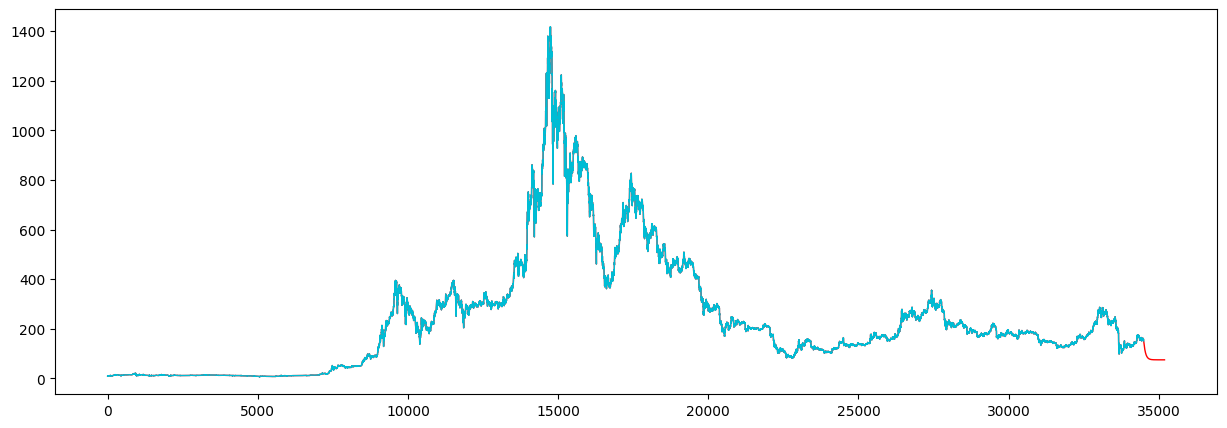

In [31]:
out = []
out = np.append(df.Close.values,new)
plt.figure(figsize=(15,5))
plt.plot(out,linewidth=1,color='red')
plt.plot(df.Close.values,linewidth=1,color='#00bcd4')
plt.show()

In [32]:
len(out),len(df.Close)

(35193, 34497)

<h3> Saving the Model</h3>

In [33]:
import pickle


model.save('model.h5')
filename = 'scaler.pkl'
f = open(filename, 'wb')
pickle.dump(sc,f )
f.close()

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
with open('window.npy', 'wb') as f:
    np.save(f, windows_sc)
with open('target.npy', 'wb') as f:
    np.save(f, target_sc)